# Temperature Prediction


## Importing Libraries

In [413]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

## Data Exploration and Preprocessing

In [414]:
# Loading the Dataset
df=pd.read_csv("temperature.csv")

# To display all the columns present in the dataset
pd.set_option('display.max_columns',None)

# Printing the first 5 rows of the dataset
df.head()

station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0      1.0  30-06-2013          28.7          21.4    58.255688    91.116364   
1      2.0  30-06-2013          31.9          21.6    52.263397    90.604721   
2      3.0  30-06-2013          31.6          23.3    48.690479    83.973587   
3      4.0  30-06-2013          32.0          23.4    58.239788    96.483688   
4      5.0  30-06-2013          31.4          21.9    56.174095    90.155128   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  LDAPS_CC1  \
0         28.074101         23.006936  6.818887   69.451805   0.233947   
1         29.850689         24.035009  5.691890   51.937448   0.225508   
2         30.091292         24.565633  6.138224   20.573050   0.209344   
3         29.704629         23.326177  5.650050   65.727144   0.216372   
4         29.113934         23.486480  5.735004  107.965535   0.151407   

   LDAPS_CC2  LDAPS_CC3  LDAPS_CC4  LDAPS_PPT1  LDAPS_PPT2  LDAPS_PPT3  \
0   0.203896   0.161697   0.130928         0.0         0.0         0.0   
1   0.251771   0.159444   0.127727         0.0         0.0         0.0   
2   0.257469   0.204091   0.142125         0.0         0.0         0.0   
3   0.226002   0.161157   0.134249         0.0         0.0         0.0   
4   0.249995   0.178892   0.170021         0.0         0.0         0.0   

   LDAPS_PPT4      lat      lon       DEM   Slope  Solar radiation  Next_Tmax  \
0         0.0  37.6046  126.991  212.3350  2.7850      5992.895996       29.1   
1         0.0  37.6046  127.032   44.7624  0.5141      5869.312500       30.5   
2         0.0  37.5776  127.058   33.3068  0.2661      5863.555664       31.1   
3         0.0  37.6450  127.022   45.7160  2.5348      5856.964844       31.7   
4         0.0  37.5507  127.135   35.0380  0.5055      5859.552246       31.2   

   Next_Tmin  
0       21.2  
1       22.5  
2       23.9  
3       24.3  
4       22.5

#### Task:
- There are two target variables here:

1) Next_Tmax: Next day maximum temperature

2) Next_Tmin: Next day  minimum temperature

In [415]:
# checking the number of rows and columns in the dataset
df.shape

(7752, 25)

- In our dataset, there are 7752 rows and 25 columns including our both the target variables.

In [416]:
df.columns

Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

In [417]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


- We see that there are null values in many of the columns.
- All the columns have float type values except for Date column which has object values.

In [418]:
# checking the unique value count 
df.nunique()

station               25
Date                 310
Present_Tmax         167
Present_Tmin         155
LDAPS_RHmin         7672
LDAPS_RHmax         7664
LDAPS_Tmax_lapse    7675
LDAPS_Tmin_lapse    7675
LDAPS_WS            7675
LDAPS_LH            7675
LDAPS_CC1           7569
LDAPS_CC2           7582
LDAPS_CC3           7599
LDAPS_CC4           7524
LDAPS_PPT1          2812
LDAPS_PPT2          2510
LDAPS_PPT3          2356
LDAPS_PPT4          1918
lat                   12
lon                   25
DEM                   25
Slope                 27
Solar radiation     1575
Next_Tmax            183
Next_Tmin            157
dtype: int64

In [419]:
# checking the missing value counts for each column
df.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

- In our dataset, majority of the columns have NaN values. We can fill these NaN values either by their respective Mean or Median depending on their distribution.

In [420]:
# Statistical information
df.describe()

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
count  7750.000000   7682.000000   7682.000000  7677.000000  7677.000000   
mean     13.000000     29.768211     23.225059    56.759372    88.374804   
std       7.211568      2.969999      2.413961    14.668111     7.192004   
min       1.000000     20.000000     11.300000    19.794666    58.936283   
25%       7.000000     27.800000     21.700000    45.963543    84.222862   
50%      13.000000     29.900000     23.400000    55.039024    89.793480   
75%      19.000000     32.000000     24.900000    67.190056    93.743629   
max      25.000000     37.600000     29.900000    98.524734   100.000153   

       LDAPS_Tmax_lapse  LDAPS_Tmin_lapse     LDAPS_WS     LDAPS_LH  \
count       7677.000000       7677.000000  7677.000000  7677.000000   
mean          29.613447         23.512589     7.097875    62.505019   
std            2.947191          2.345347     2.183836    33.730589   
min           17.624954         14.272646     2.882580   -13.603212   
25%           27.673499         22.089739     5.678705    37.266753   
50%           29.703426         23.760199     6.547470    56.865482   
75%           31.710450         25.152909     8.032276    84.223616   
max           38.542255         29.619342    21.857621   213.414006   

         LDAPS_CC1    LDAPS_CC2    LDAPS_CC3    LDAPS_CC4   LDAPS_PPT1  \
count  7677.000000  7677.000000  7677.000000  7677.000000  7677.000000   
mean      0.368774     0.356080     0.318404     0.299191     0.591995   
std       0.262458     0.258061     0.250362     0.254348     1.945768   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.146654     0.140615     0.101388     0.081532     0.000000   
50%       0.315697     0.312421     0.262555     0.227664     0.000000   
75%       0.575489     0.558694     0.496703     0.499489     0.052525   
max       0.967277     0.968353     0.983789     0.974710    23.701544   

        LDAPS_PPT2   LDAPS_PPT3   LDAPS_PPT4          lat          lon  \
count  7677.000000  7677.000000  7677.000000  7752.000000  7752.000000   
mean      0.485003     0.278200     0.269407    37.544722   126.991397   
std       1.762807     1.161809     1.206214     0.050352     0.079435   
min       0.000000     0.000000     0.000000    37.456200   126.826000   
25%       0.000000     0.000000     0.000000    37.510200   126.937000   
50%       0.000000     0.000000     0.000000    37.550700   126.995000   
75%       0.018364     0.007896     0.000041    37.577600   127.042000   
max      21.621661    15.841235    16.655469    37.645000   127.135000   

               DEM        Slope  Solar radiation    Next_Tmax    Next_Tmin  
count  7752.000000  7752.000000      7752.000000  7725.000000  7725.000000  
mean     61.867972     1.257048      5341.502803    30.274887    22.932220  
std      54.279780     1.370444       429.158867     3.128010     2.487613  
min      12.370000     0.098475      4329.520508    17.400000    11.300000  
25%      28.700000     0.271300      4999.018555    28.200000    21.300000  
50%      45.716000     0.618000      5436.345215    30.500000    23.100000  
75%      59.832400     1.767800      5728.316406    32.600000    24.600000  
max     212.335000     5.178230      5992.895996    38.900000    29.800000

#### Statistical Observations:
- Since the count is not same for all the columns, there are missing values. 
- For the columns LDAPS_LH, LDAPS_CC3, LDAPS_PPT1, LDAPS_PPT2, LDAPS_PPT3, LDAPS_PPT4, Slope we see difference between the Mean and Median values. This means the distribution is not normal for them.

## Data Preprocessing

### Treating Missing Values

<AxesSubplot:xlabel='Present_Tmax', ylabel='Density'>

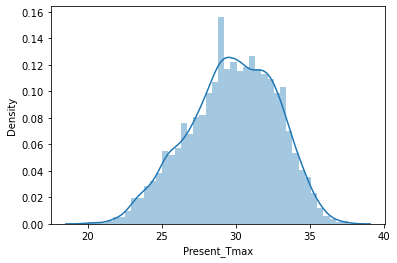

In [421]:
# Present_Tmax
sns.distplot(df["Present_Tmax"])

In [422]:
# Distribution is almost normal - Filling Missinng values with Mean
df["Present_Tmax"]=df["Present_Tmax"].fillna(df["Present_Tmax"].mean())

<AxesSubplot:xlabel='Present_Tmin', ylabel='Density'>

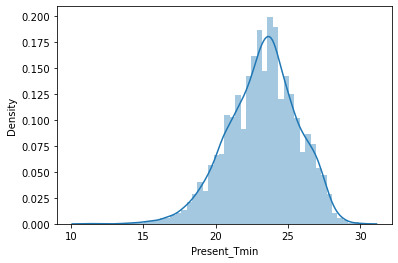

In [423]:
# Present_Tmin
sns.distplot(df["Present_Tmin"])

In [424]:
# Distribution is normal - Filling Missinng values with Mean
df["Present_Tmin"]=df["Present_Tmin"].fillna(df["Present_Tmin"].mean())

<AxesSubplot:xlabel='LDAPS_RHmin', ylabel='Density'>

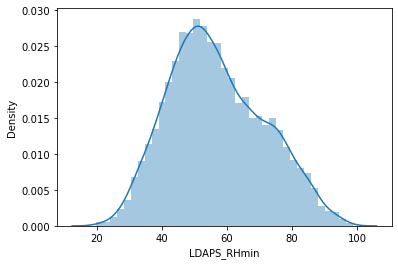

In [425]:
# LDAPS_RHmin
sns.distplot(df["LDAPS_RHmin"])

In [426]:
# Distribution is normal - Filling Missinng values with Mean
df["LDAPS_RHmin"]=df["LDAPS_RHmin"].fillna(df["LDAPS_RHmin"].mean())

<AxesSubplot:xlabel='LDAPS_RHmax', ylabel='Density'>

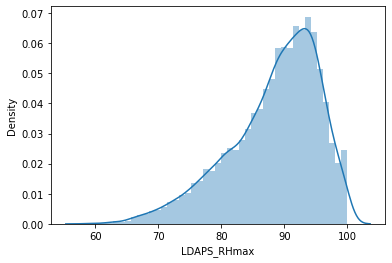

In [427]:
# LDAPS_RHmax
sns.distplot(df["LDAPS_RHmax"])

In [428]:
# Distribution is left skewed - Filling Missing values with Median
df["LDAPS_RHmax"]=df["LDAPS_RHmax"].fillna(df["LDAPS_RHmax"].median())

<AxesSubplot:xlabel='LDAPS_Tmax_lapse', ylabel='Density'>

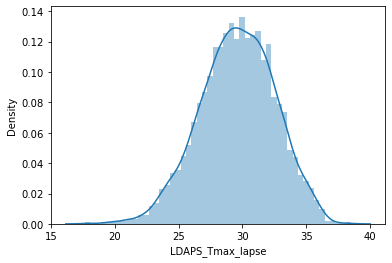

In [429]:
# LDAPS_Tmax_lapse
sns.distplot(df["LDAPS_Tmax_lapse"])

In [430]:
# Distribution is normal - Filling Missing values with Mean
df["LDAPS_Tmax_lapse"]=df["LDAPS_Tmax_lapse"].fillna(df["LDAPS_Tmax_lapse"].mean())

<AxesSubplot:xlabel='LDAPS_Tmin_lapse', ylabel='Density'>

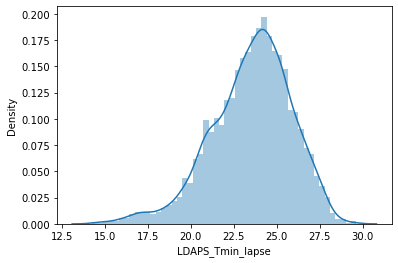

In [431]:
# LDAPS_Tmin_lapse
sns.distplot(df["LDAPS_Tmin_lapse"])

In [432]:
# Distribution is slightly left skewed - Filling Missing values with Median
df["LDAPS_Tmin_lapse"]=df["LDAPS_Tmin_lapse"].fillna(df["LDAPS_Tmin_lapse"].median())

<AxesSubplot:xlabel='LDAPS_WS', ylabel='Density'>

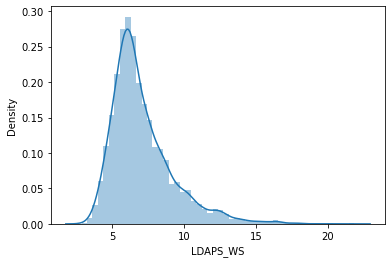

In [433]:
# LDAPS_WS
sns.distplot(df["LDAPS_WS"])

In [434]:
# Distribution is right skewed - Filling Missing values with Median
df["LDAPS_WS"]=df["LDAPS_WS"].fillna(df["LDAPS_WS"].median())

<AxesSubplot:xlabel='LDAPS_LH', ylabel='Density'>

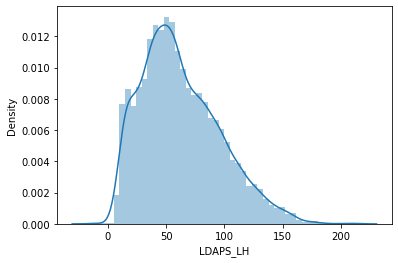

In [435]:
# LDAPS_LH
sns.distplot(df["LDAPS_LH"])

In [436]:
# Distribution is slightly right skewed - Filling Missing values with Median
df["LDAPS_LH"]=df["LDAPS_LH"].fillna(df["LDAPS_LH"].median())

<AxesSubplot:xlabel='LDAPS_CC1', ylabel='Density'>

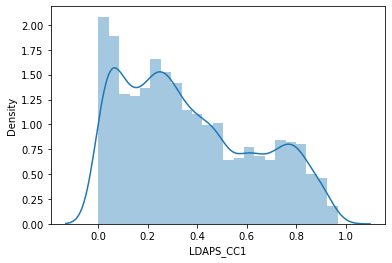

In [437]:
# LDAPS_CC1
sns.distplot(df["LDAPS_CC1"])

In [438]:
# Distribution is close to normal - Filling Missing values with Mean
df["LDAPS_CC1"]=df["LDAPS_CC1"].fillna(df["LDAPS_CC1"].mean())

<AxesSubplot:xlabel='LDAPS_CC2', ylabel='Density'>

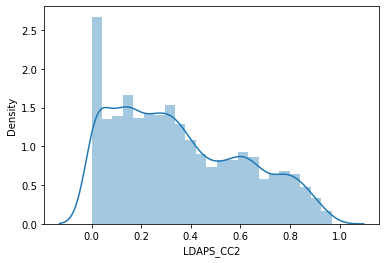

In [439]:
# LDAPS_CC2
sns.distplot(df["LDAPS_CC2"])

In [440]:
# Distribution is close to normal - Filling Missing values with Mean
df["LDAPS_CC2"]=df["LDAPS_CC2"].fillna(df["LDAPS_CC2"].mean())

<AxesSubplot:xlabel='LDAPS_CC3', ylabel='Density'>

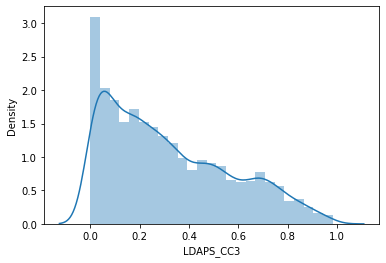

In [441]:
# LDAPS_CC3
sns.distplot(df["LDAPS_CC3"])

In [442]:
# Distribution is right skewed - Filling Missing values with Median
df["LDAPS_CC3"]=df["LDAPS_CC3"].fillna(df["LDAPS_CC3"].median())

<AxesSubplot:xlabel='LDAPS_CC4', ylabel='Density'>

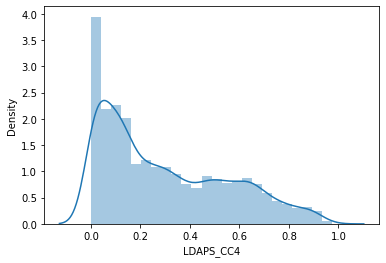

In [443]:
# LDAPS_CC4
sns.distplot(df["LDAPS_CC4"])

In [444]:
# Distribution is right skewed - Filling Missing values with Median
df["LDAPS_CC4"]=df["LDAPS_CC4"].fillna(df["LDAPS_CC4"].median())

<AxesSubplot:xlabel='LDAPS_PPT1', ylabel='Density'>

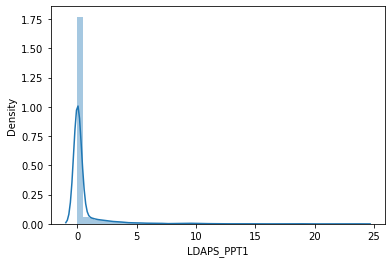

In [445]:
# LDAPS_PPT1
sns.distplot(df["LDAPS_PPT1"])

In [446]:
# Distribution is extremely right skewed - Filling Missing values with Median
df["LDAPS_PPT1"]=df["LDAPS_PPT1"].fillna(df["LDAPS_PPT1"].median())

<AxesSubplot:xlabel='LDAPS_PPT2', ylabel='Density'>

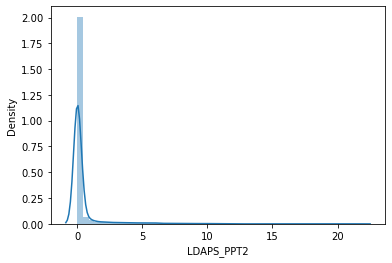

In [447]:
# LDAPS_PPT2
sns.distplot(df["LDAPS_PPT2"])

In [448]:
# Distribution is extremely right skewed - Filling Missing values with Median
df["LDAPS_PPT2"]=df["LDAPS_PPT2"].fillna(df["LDAPS_PPT2"].median())

<AxesSubplot:xlabel='LDAPS_PPT3', ylabel='Density'>

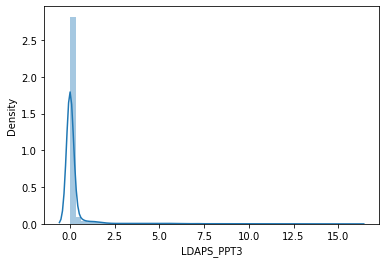

In [449]:
# LDAPS_PPT3
sns.distplot(df["LDAPS_PPT3"])

In [450]:
# Distribution is extremely right skewed - Filling Missing values with Median
df["LDAPS_PPT3"]=df["LDAPS_PPT3"].fillna(df["LDAPS_PPT3"].median())

<AxesSubplot:xlabel='LDAPS_PPT4', ylabel='Density'>

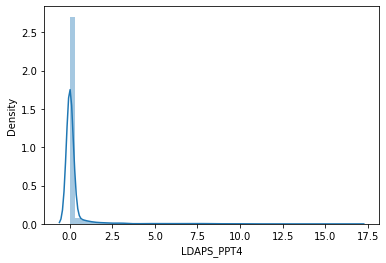

In [451]:
# LDAPS_PPT4
sns.distplot(df["LDAPS_PPT4"])

In [452]:
# Distribution is extremely right skewed - Filling Missing values with Median
df["LDAPS_PPT4"]=df["LDAPS_PPT4"].fillna(df["LDAPS_PPT4"].median())

<AxesSubplot:xlabel='Next_Tmax', ylabel='Density'>

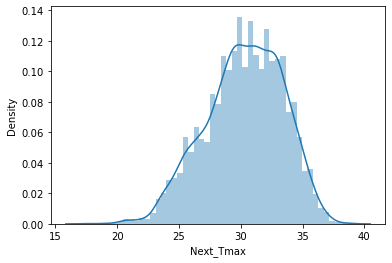

In [453]:
# Next_Tmax
sns.distplot(df["Next_Tmax"])

In [454]:
# Distribution is normal - Filling Missing values with Mean
df["Next_Tmax"]=df["Next_Tmax"].fillna(df["Next_Tmax"].mean())

<AxesSubplot:xlabel='Next_Tmin', ylabel='Density'>

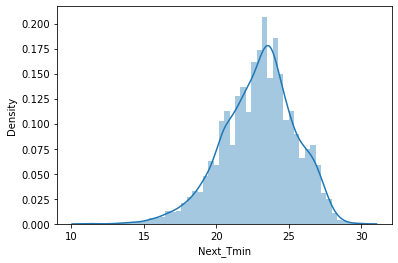

In [455]:
# Next_Tmin
sns.distplot(df["Next_Tmin"])

In [456]:
# Distribution is normal - Filling Missing values with Mean
df["Next_Tmin"]=df["Next_Tmin"].fillna(df["Next_Tmin"].mean())

In [457]:
# Date and station - Let's check these missing values
df[df["Date"].isnull()==True]

station Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
7750      NaN  NaN          20.0          11.3    19.794666    58.936283   
7751      NaN  NaN          37.6          29.9    98.524734   100.000153   

      LDAPS_Tmax_lapse  LDAPS_Tmin_lapse   LDAPS_WS    LDAPS_LH  LDAPS_CC1  \
7750         17.624954         14.272646   2.882580  -13.603212   0.000000   
7751         38.542255         29.619342  21.857621  213.414006   0.967277   

      LDAPS_CC2  LDAPS_CC3  LDAPS_CC4  LDAPS_PPT1  LDAPS_PPT2  LDAPS_PPT3  \
7750   0.000000   0.000000    0.00000    0.000000    0.000000    0.000000   
7751   0.968353   0.983789    0.97471   23.701544   21.621661   15.841235   

      LDAPS_PPT4      lat      lon      DEM     Slope  Solar radiation  \
7750    0.000000  37.4562  126.826   12.370  0.098475      4329.520508   
7751   16.655469  37.6450  127.135  212.335  5.178230      5992.895996   

      Next_Tmax  Next_Tmin  
7750       17.4       11.3  
7751       38.9       29.8

- As we can see we have only two null values for these two columns. Our dataset is huge so we can drop these two null values.

In [458]:
# Dropping the remaining null values from our dataset
df.dropna(inplace=True)

- Let's check the missing values count now.

In [459]:
df.isnull().sum()

station             0
Date                0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

- Great! All the missing values are filled now!

### Creation of New Attributes from the Existing Columns

In [460]:
df["Day"]=pd.to_datetime(df.Date).dt.day
df["Month"]=pd.to_datetime(df.Date).dt.month
df["Year"]=pd.to_datetime(df.Date).dt.year

# Dropping Date column
df.drop("Date",axis=1,inplace=True)

In [461]:
df.head()

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0      1.0          28.7          21.4    58.255688    91.116364   
1      2.0          31.9          21.6    52.263397    90.604721   
2      3.0          31.6          23.3    48.690479    83.973587   
3      4.0          32.0          23.4    58.239788    96.483688   
4      5.0          31.4          21.9    56.174095    90.155128   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  LDAPS_CC1  \
0         28.074101         23.006936  6.818887   69.451805   0.233947   
1         29.850689         24.035009  5.691890   51.937448   0.225508   
2         30.091292         24.565633  6.138224   20.573050   0.209344   
3         29.704629         23.326177  5.650050   65.727144   0.216372   
4         29.113934         23.486480  5.735004  107.965535   0.151407   

   LDAPS_CC2  LDAPS_CC3  LDAPS_CC4  LDAPS_PPT1  LDAPS_PPT2  LDAPS_PPT3  \
0   0.203896   0.161697   0.130928         0.0         0.0         0.0   
1   0.251771   0.159444   0.127727         0.0         0.0         0.0   
2   0.257469   0.204091   0.142125         0.0         0.0         0.0   
3   0.226002   0.161157   0.134249         0.0         0.0         0.0   
4   0.249995   0.178892   0.170021         0.0         0.0         0.0   

   LDAPS_PPT4      lat      lon       DEM   Slope  Solar radiation  Next_Tmax  \
0         0.0  37.6046  126.991  212.3350  2.7850      5992.895996       29.1   
1         0.0  37.6046  127.032   44.7624  0.5141      5869.312500       30.5   
2         0.0  37.5776  127.058   33.3068  0.2661      5863.555664       31.1   
3         0.0  37.6450  127.022   45.7160  2.5348      5856.964844       31.7   
4         0.0  37.5507  127.135   35.0380  0.5055      5859.552246       31.2   

   Next_Tmin  Day  Month  Year  
0       21.2   30      6  2013  
1       22.5   30      6  2013  
2       23.9   30      6  2013  
3       24.3   30      6  2013  
4       22.5   30      6  2013

## Exploratory Data Analysis

<AxesSubplot:xlabel='Present_Tmax', ylabel='Density'>

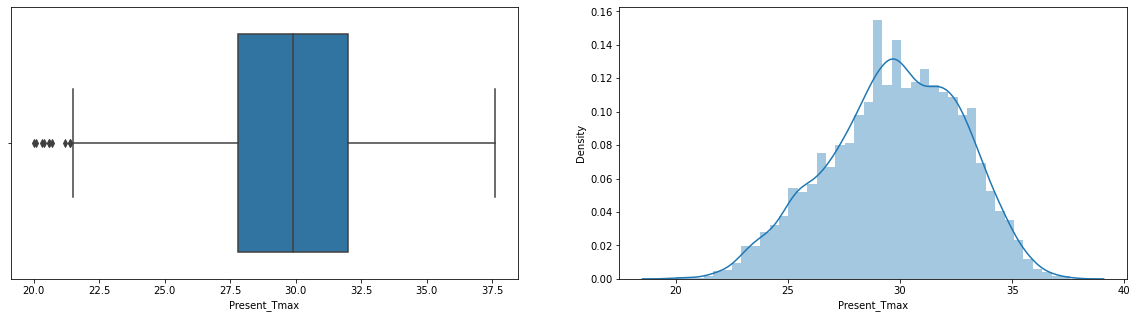

In [462]:
# Present_Tmax
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
sns.boxplot(df["Present_Tmax"])
plt.subplot(1,2,2)
sns.distplot(df["Present_Tmax"])

#### Observation:
- The distribution for Present_Tmax is normal and there are few outliers.

<AxesSubplot:xlabel='Present_Tmin', ylabel='Density'>

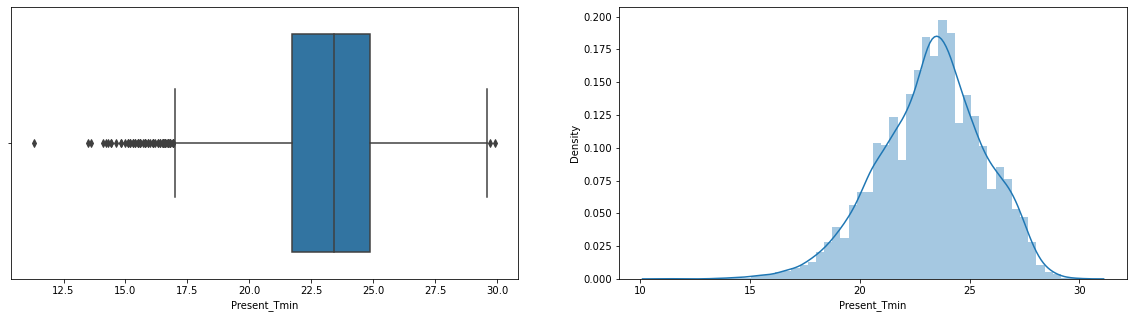

In [463]:
# Present_Tmin
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
sns.boxplot(df["Present_Tmin"])
plt.subplot(1,2,2)
sns.distplot(df["Present_Tmin"])

#### Observation:
- The distribution for Present_Tmin is normal and there are few extreme outliers.

<AxesSubplot:xlabel='LDAPS_RHmin', ylabel='Density'>

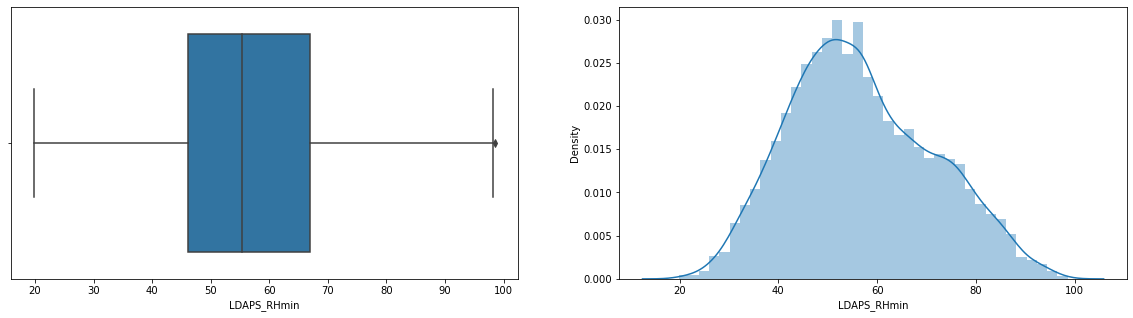

In [464]:
# LDAPS_RHmin
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
sns.boxplot(df["LDAPS_RHmin"])
plt.subplot(1,2,2)
sns.distplot(df["LDAPS_RHmin"])

#### Observation:
- The distribution for LDAPS_RHmin is normal and there are no outliers.

<AxesSubplot:xlabel='LDAPS_RHmax', ylabel='Density'>

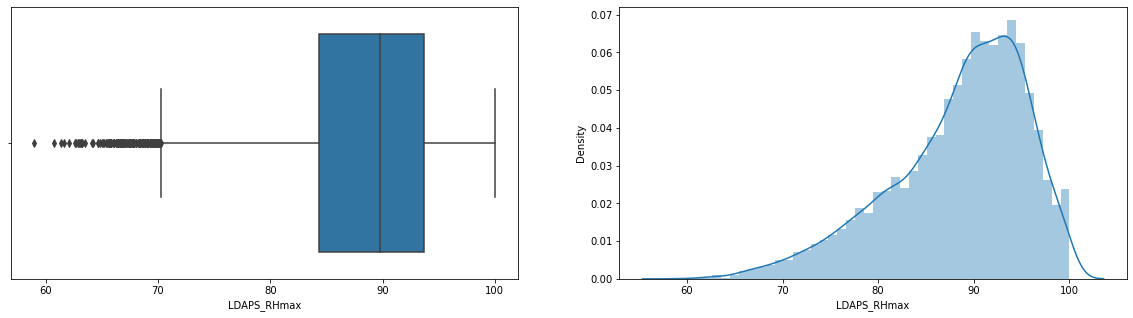

In [465]:
# LDAPS_RHmax
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
sns.boxplot(df["LDAPS_RHmax"])
plt.subplot(1,2,2)
sns.distplot(df["LDAPS_RHmax"])

#### Observation:
- The distribution for LDAPS_RHmax is left skewed and there are extreme outliers.

<AxesSubplot:xlabel='LDAPS_Tmax_lapse', ylabel='Density'>

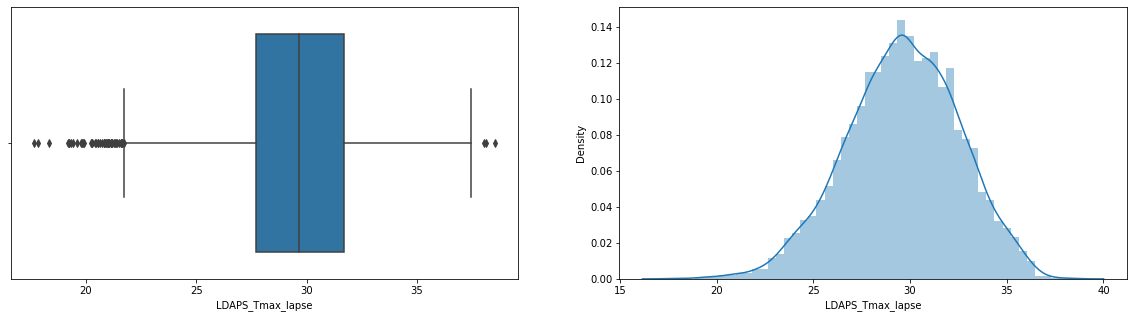

In [466]:
# LDAPS_Tmax_lapse
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
sns.boxplot(df["LDAPS_Tmax_lapse"])
plt.subplot(1,2,2)
sns.distplot(df["LDAPS_Tmax_lapse"])

#### Observation:
- The distribution for LDAPS_Tmax_lapse is normal and there are few outliers.

<AxesSubplot:xlabel='LDAPS_Tmin_lapse', ylabel='Density'>

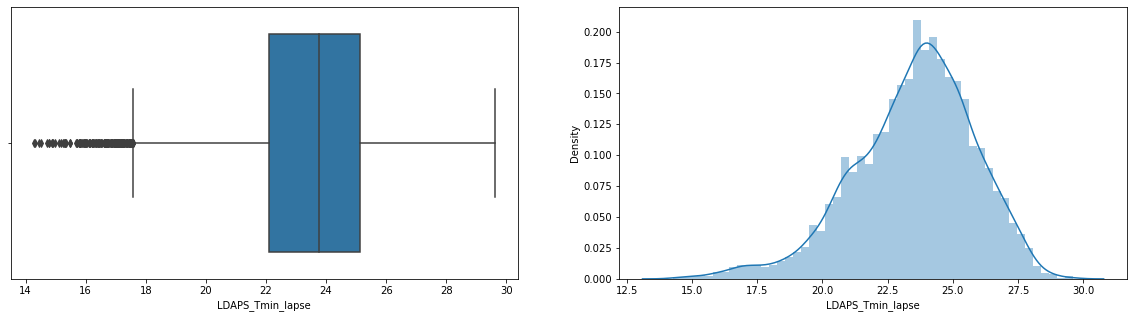

In [467]:
# LDAPS_Tmin_lapse
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
sns.boxplot(df["LDAPS_Tmin_lapse"])
plt.subplot(1,2,2)
sns.distplot(df["LDAPS_Tmin_lapse"])

#### Observation:
- The distribution for LDAPS_Tmin_lapse is slightly left skewed and there are extreme outliers.

<AxesSubplot:xlabel='LDAPS_WS', ylabel='Density'>

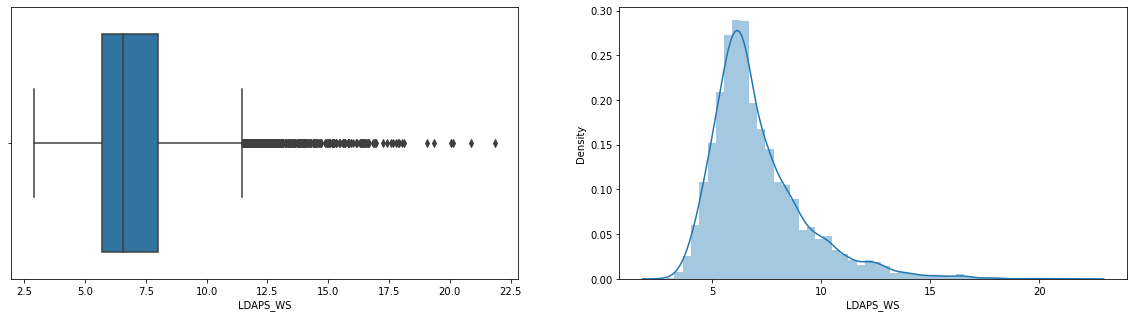

In [468]:
# LDAPS_WS
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
sns.boxplot(df["LDAPS_WS"])
plt.subplot(1,2,2)
sns.distplot(df["LDAPS_WS"])

#### Observation:
- The distribution for LDAPS_WS is left skewed and there are extreme outliers present. 

<AxesSubplot:xlabel='LDAPS_LH', ylabel='Density'>

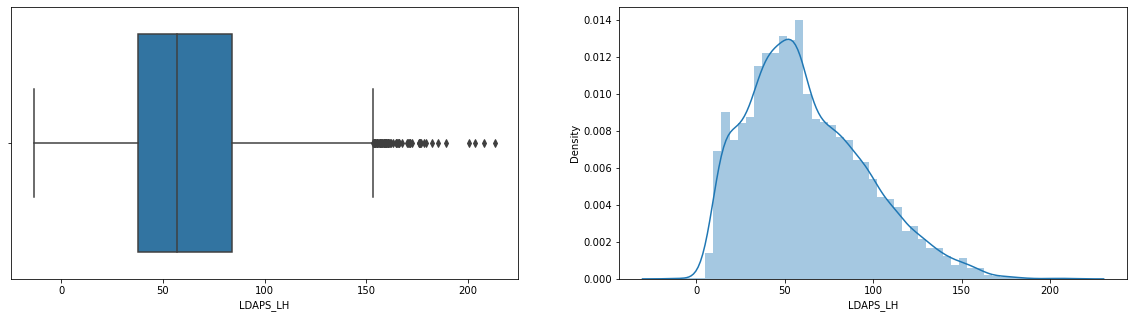

In [469]:
# LDAPS_LH
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
sns.boxplot(df["LDAPS_LH"])
plt.subplot(1,2,2)
sns.distplot(df["LDAPS_LH"])

#### Observation:
- The distribution for LDAPS_LH is right skewed and there are extreme outliers present.

<AxesSubplot:xlabel='LDAPS_CC1', ylabel='Density'>

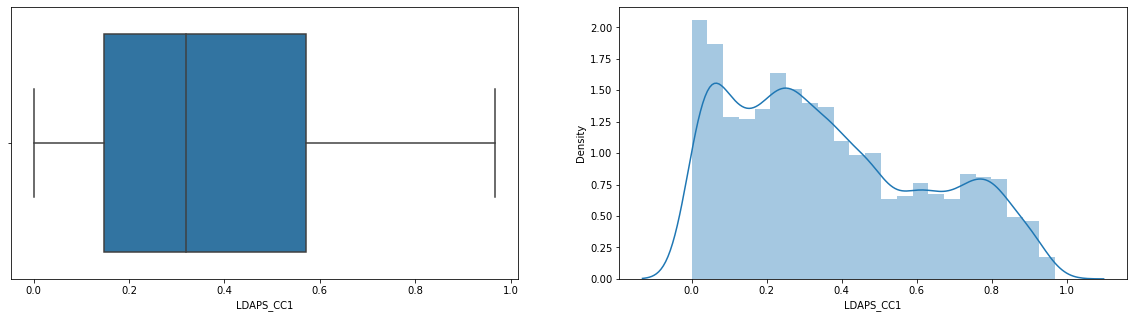

In [470]:
# LDAPS_CC1
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
sns.boxplot(df["LDAPS_CC1"])
plt.subplot(1,2,2)
sns.distplot(df["LDAPS_CC1"])

#### Observation:
- The distribution for LDAPS_CC1 is normal and there are no outliers present.

<AxesSubplot:xlabel='LDAPS_CC2', ylabel='Density'>

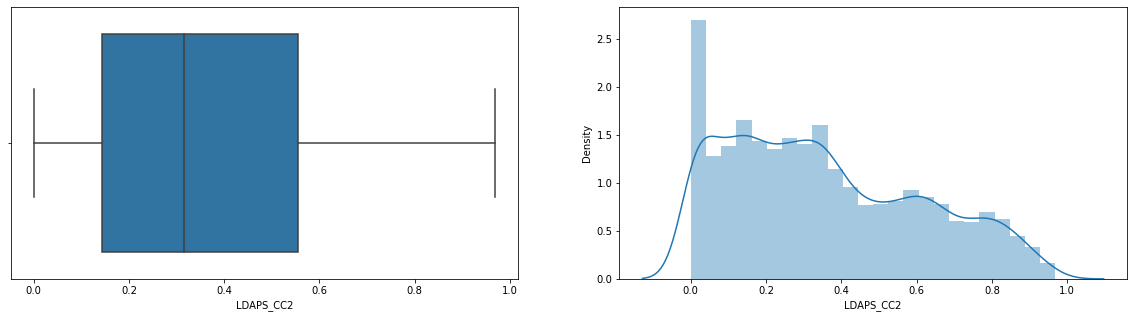

In [471]:
# LDAPS_CC2
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
sns.boxplot(df["LDAPS_CC2"])
plt.subplot(1,2,2)
sns.distplot(df["LDAPS_CC2"])

#### Observation:
- The distribution for LDAPS_CC2 is normal and there are no outliers present.

<AxesSubplot:xlabel='LDAPS_CC3', ylabel='Density'>

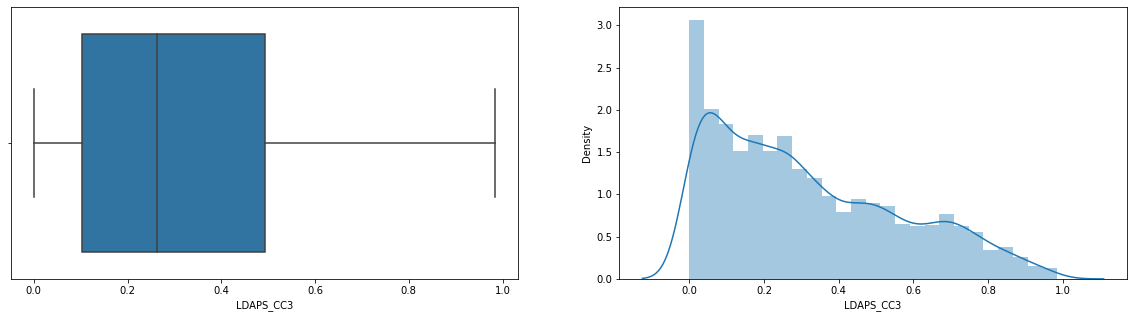

In [472]:
# LDAPS_CC3
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
sns.boxplot(df["LDAPS_CC3"])
plt.subplot(1,2,2)
sns.distplot(df["LDAPS_CC3"])

#### Observation:
- The distribution for LDAPS_CC3 is right skewed and there are no outliers.

<AxesSubplot:xlabel='LDAPS_CC4', ylabel='Density'>

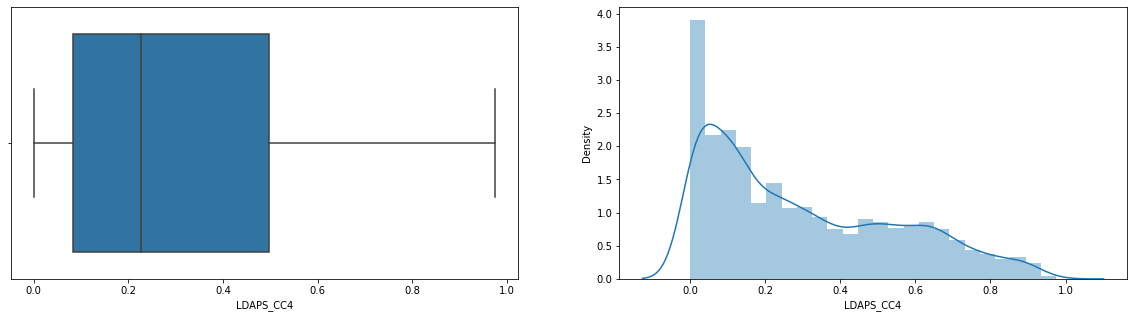

In [473]:
# LDAPS_CC4
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
sns.boxplot(df["LDAPS_CC4"])
plt.subplot(1,2,2)
sns.distplot(df["LDAPS_CC4"])

#### Observation:
- The distribution for LDAPS_CC4 is right skewed and there are no outliers.

<AxesSubplot:xlabel='LDAPS_PPT1', ylabel='Density'>

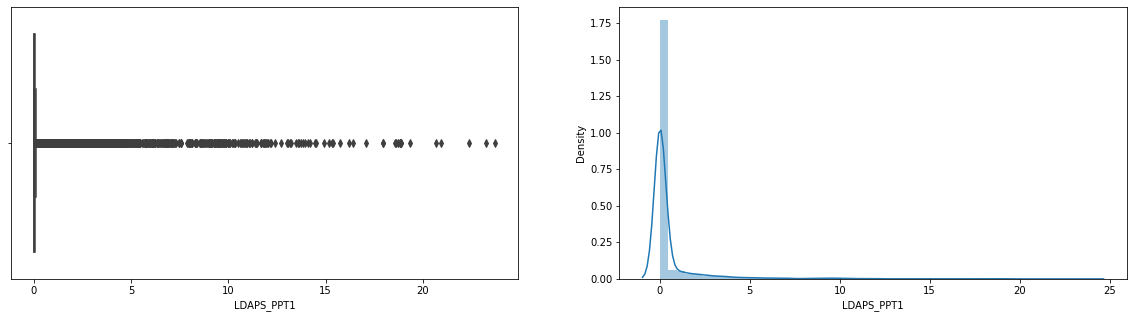

In [474]:
# LDAPS_PPT1
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
sns.boxplot(df["LDAPS_PPT1"])
plt.subplot(1,2,2)
sns.distplot(df["LDAPS_PPT1"])

#### Observation:
- The distribution for LDAPS_PPT1 is right skewed and there are many extreme outliers.

<AxesSubplot:xlabel='LDAPS_PPT2', ylabel='Density'>

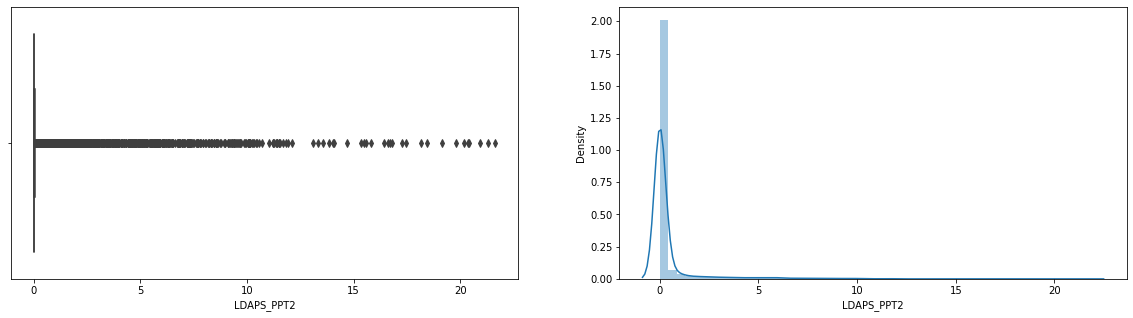

In [475]:
# LDAPS_PPT2
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
sns.boxplot(df["LDAPS_PPT2"])
plt.subplot(1,2,2)
sns.distplot(df["LDAPS_PPT2"])

#### Observation:
- The distribution for LDAPS_PPT2 is right skewed and there are many extreme outliers.

<AxesSubplot:xlabel='LDAPS_PPT3', ylabel='Density'>

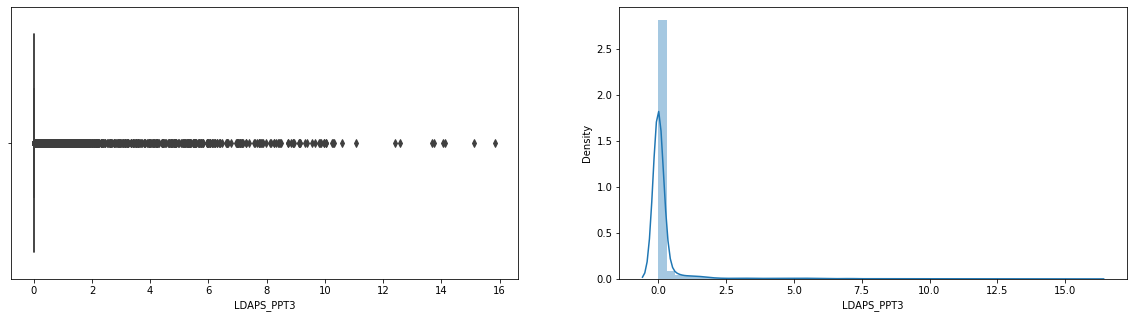

In [476]:
# LDAPS_PPT3
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
sns.boxplot(df["LDAPS_PPT3"])
plt.subplot(1,2,2)
sns.distplot(df["LDAPS_PPT3"])

#### Observation:
- The distribution for LDAPS_PPT3 is right skewed and there are many extreme outliers.

<AxesSubplot:xlabel='LDAPS_PPT4', ylabel='Density'>

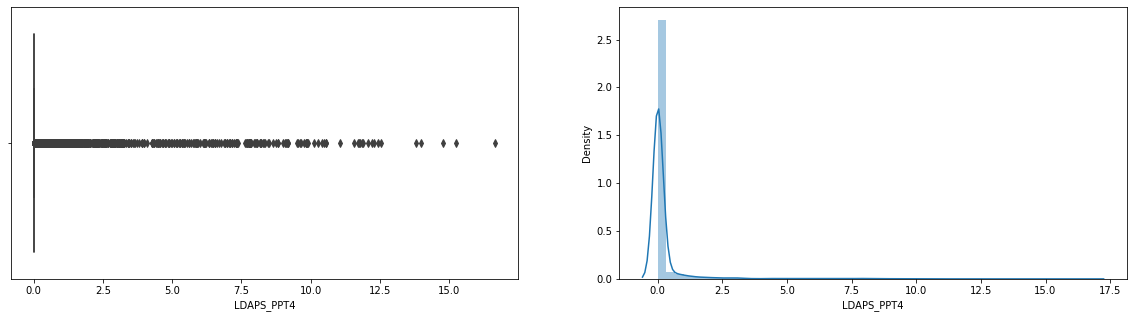

In [477]:
# LDAPS_PPT4
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
sns.boxplot(df["LDAPS_PPT4"])
plt.subplot(1,2,2)
sns.distplot(df["LDAPS_PPT4"])

#### Observation:
- The distribution for LDAPS_PPT4 is right skewed and there are many extreme outliers.

<AxesSubplot:xlabel='lat', ylabel='Density'>

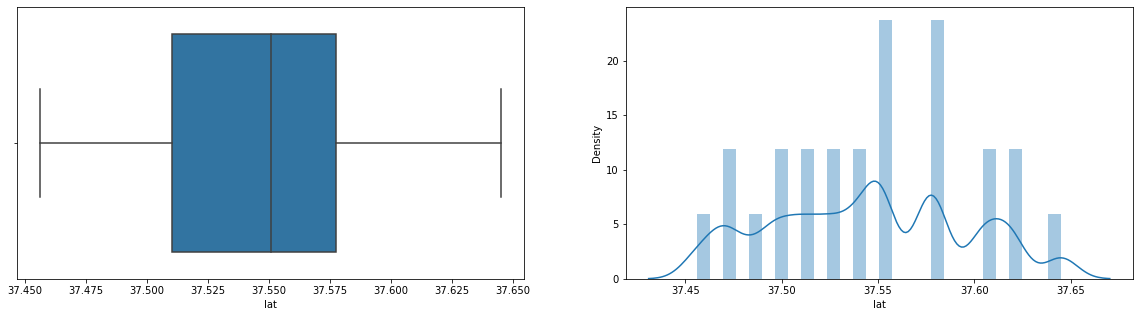

In [478]:
# lat
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
sns.boxplot(df["lat"])
plt.subplot(1,2,2)
sns.distplot(df["lat"])

#### Observation:
- The distribution for lat is normal and there are no outliers.

<AxesSubplot:xlabel='lon', ylabel='Density'>

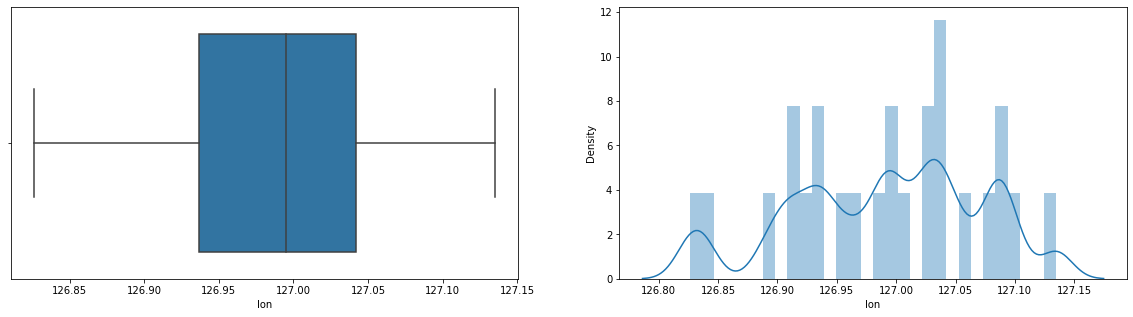

In [479]:
# lon
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
sns.boxplot(df["lon"])
plt.subplot(1,2,2)
sns.distplot(df["lon"])

#### Observation:
- The distribution for lon is normal and there are no outliers.

<AxesSubplot:xlabel='DEM', ylabel='Density'>

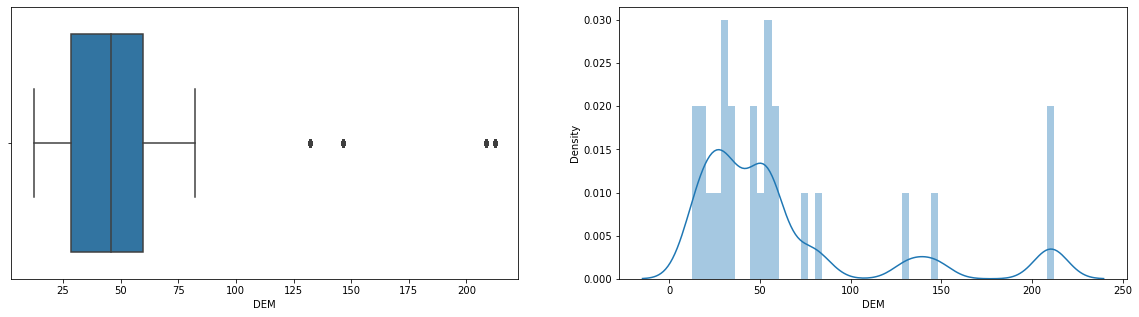

In [480]:
# DEM
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
sns.boxplot(df["DEM"])
plt.subplot(1,2,2)
sns.distplot(df["DEM"])

#### Observation:
- The distribution for DEM is right skewed as there are few extreme outliers present. 

<AxesSubplot:xlabel='Slope', ylabel='Density'>

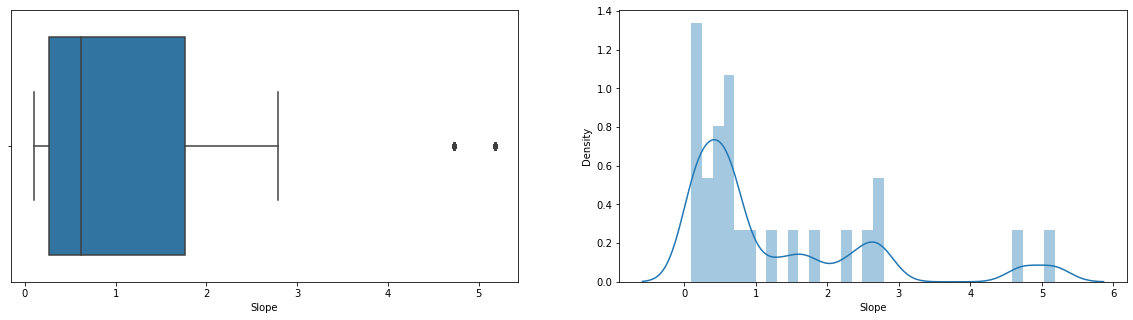

In [481]:
# Slope
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
sns.boxplot(df["Slope"])
plt.subplot(1,2,2)
sns.distplot(df["Slope"])

#### Observation:
- The distribution for Slope is right skewed as there are few extreme outliers present.

<AxesSubplot:xlabel='Solar radiation', ylabel='Density'>

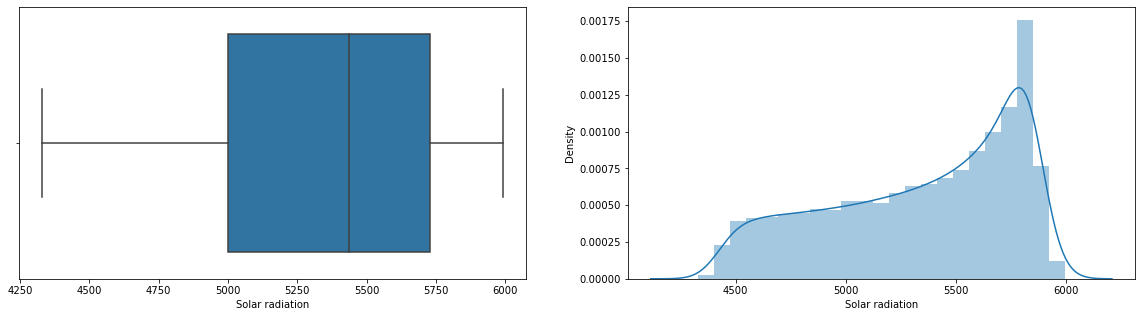

In [482]:
# Solar radiation
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
sns.boxplot(df["Solar radiation"])
plt.subplot(1,2,2)
sns.distplot(df["Solar radiation"])

<AxesSubplot:xlabel='Next_Tmax', ylabel='Density'>

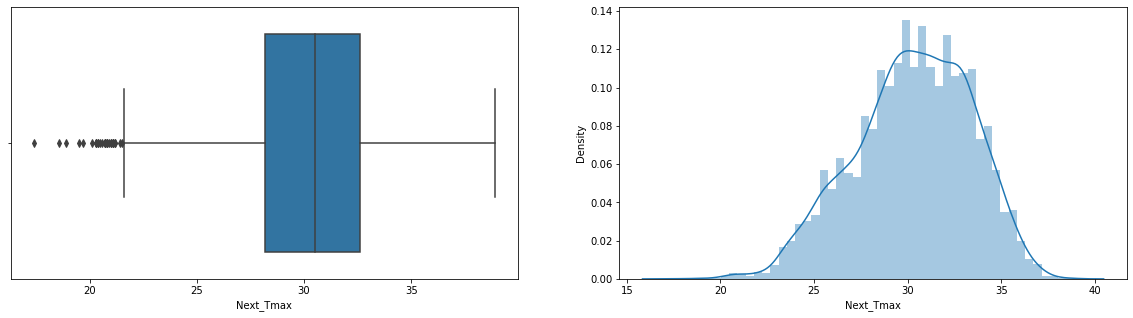

In [483]:
# Next_Tmax
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
sns.boxplot(df["Next_Tmax"])
plt.subplot(1,2,2)
sns.distplot(df["Next_Tmax"])

#### Observation:
- The distribution for Next_Tmax is normal and there are few outliers present. 

<AxesSubplot:xlabel='Next_Tmin', ylabel='Density'>

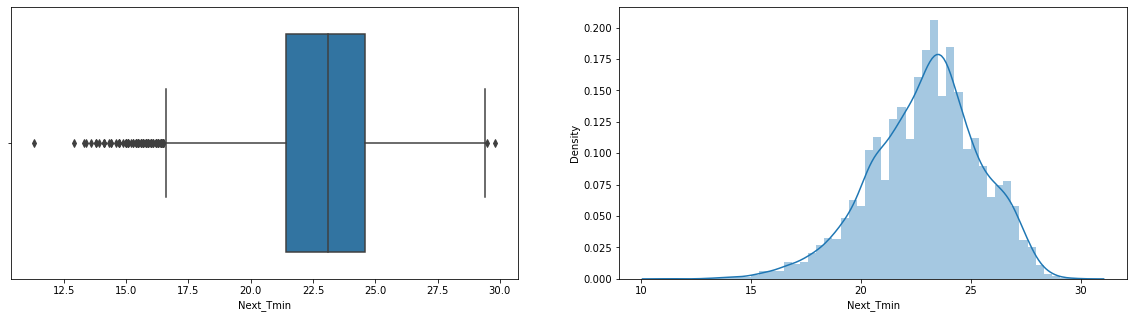

In [484]:
# Next_Tmin
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
sns.boxplot(df["Next_Tmin"])
plt.subplot(1,2,2)
sns.distplot(df["Next_Tmin"])

#### Observation:
- The distribution for Next_Tmin is normal and there are few outliers present.

### B] Bivariate Analysis

<AxesSubplot:xlabel='Present_Tmax', ylabel='Next_Tmax'>

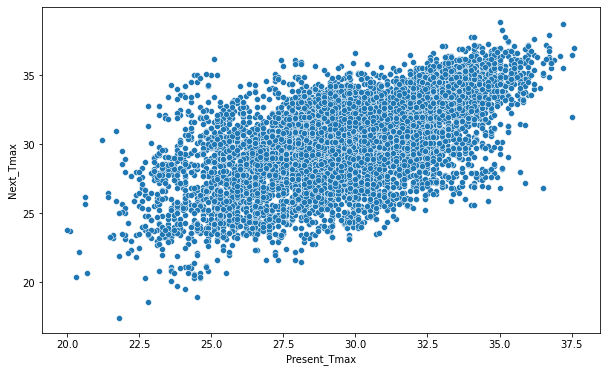

In [485]:
plt.figure(figsize=(10,6))
sns.scatterplot(x="Present_Tmax",y="Next_Tmax",data=df)

#### Observation:
- There is a positive relationship between Present_Tmax and Next_Tmax. 

<AxesSubplot:xlabel='Present_Tmin', ylabel='Next_Tmax'>

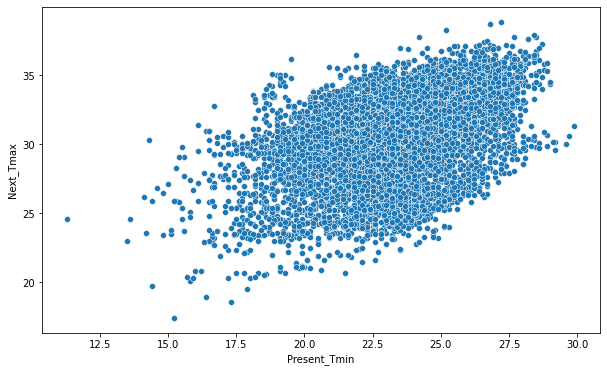

In [486]:
plt.figure(figsize=(10,6))
sns.scatterplot(x="Present_Tmin",y="Next_Tmax",data=df)

#### Observation:
- There is a positive relationship between Present_Tmin and Next_Tmax. 

<AxesSubplot:xlabel='LDAPS_RHmin', ylabel='Next_Tmax'>

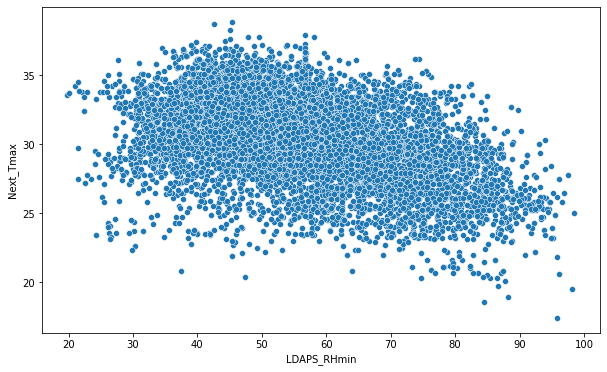

In [487]:
plt.figure(figsize=(10,6))
sns.scatterplot(x="LDAPS_RHmin",y="Next_Tmax",data=df)

#### Observation:
- There is a negative relationship between LDAPS_RHmin and Next_Tmax.

<AxesSubplot:xlabel='LDAPS_RHmax', ylabel='Next_Tmax'>

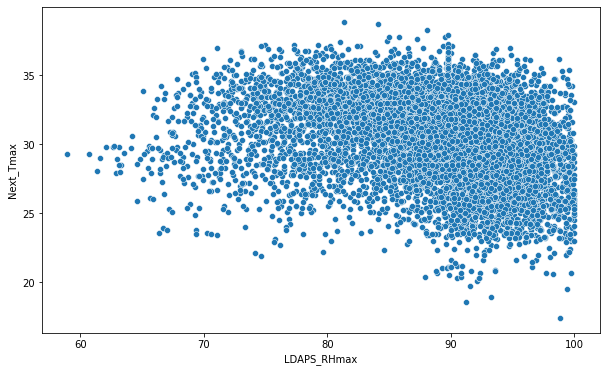

In [488]:
plt.figure(figsize=(10,6))
sns.scatterplot(x="LDAPS_RHmax",y="Next_Tmax",data=df)

#### Observation:
- Higher the LDAPS_RHmax, higher is the Next_Tmax.

<AxesSubplot:xlabel='LDAPS_Tmax_lapse', ylabel='Next_Tmax'>

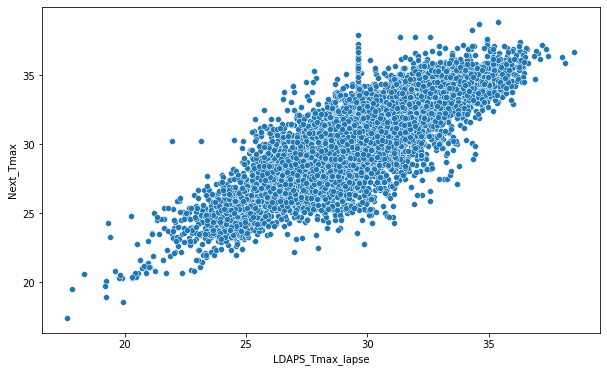

In [489]:
plt.figure(figsize=(10,6))
sns.scatterplot(x="LDAPS_Tmax_lapse",y="Next_Tmax",data=df)

#### Observation:
- There is a positive relationship between LDAPS_Tmax_lapse and Next_Tmax.

<AxesSubplot:xlabel='LDAPS_Tmin_lapse', ylabel='Next_Tmax'>

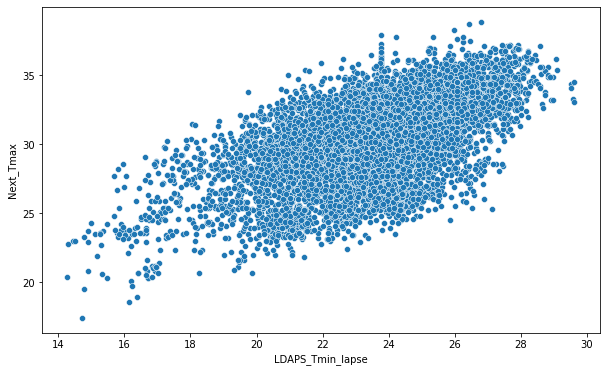

In [490]:
plt.figure(figsize=(10,6))
sns.scatterplot(x="LDAPS_Tmin_lapse",y="Next_Tmax",data=df)

#### Observation:
- There is a positive relationship between LDAPS_Tmin_lapse and Next_Tmax.

<AxesSubplot:xlabel='LDAPS_WS', ylabel='Next_Tmax'>

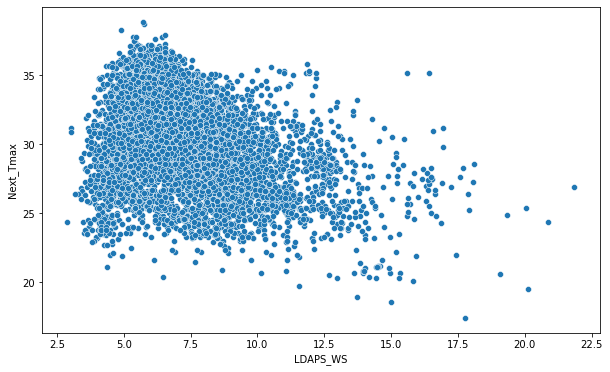

In [491]:
plt.figure(figsize=(10,6))
sns.scatterplot(x="LDAPS_WS",y="Next_Tmax",data=df)

#### Observation:
- Here we observe a slight negative relationship between LDAPS_WS and Next_Tmax.

<AxesSubplot:xlabel='LDAPS_LH', ylabel='Next_Tmax'>

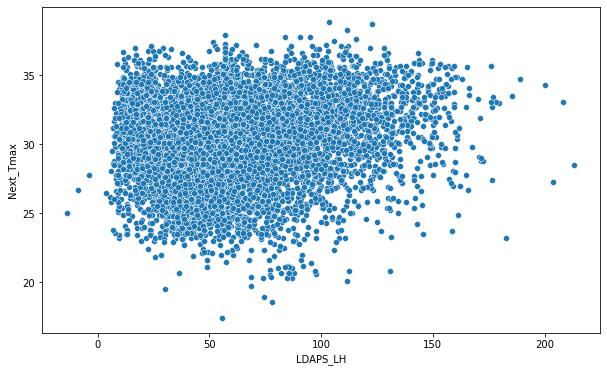

In [492]:
plt.figure(figsize=(10,6))
sns.scatterplot(x="LDAPS_LH",y="Next_Tmax",data=df)

#### Observation:
- There is no relationship between LDAPS_LH and Next_Tmax.

<AxesSubplot:xlabel='LDAPS_CC1', ylabel='Next_Tmax'>

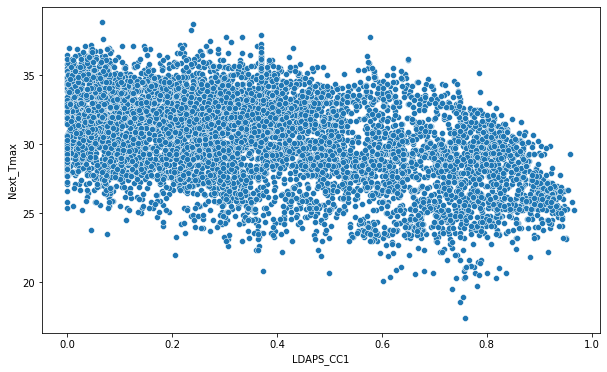

In [493]:
plt.figure(figsize=(10,6))
sns.scatterplot(x="LDAPS_CC1",y="Next_Tmax",data=df)

#### Observation:
- There is a slight negative relationship between LDAPS_CC1 and Next_Tmax.

<AxesSubplot:xlabel='LDAPS_CC2', ylabel='Next_Tmax'>

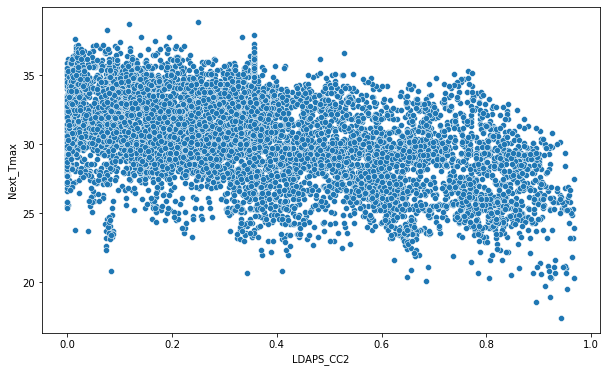

In [494]:
plt.figure(figsize=(10,6))
sns.scatterplot(x="LDAPS_CC2",y="Next_Tmax",data=df)

#### Observation:
- There is a slight negative relationship between LDAPS_CC2 and Next_Tmax.

<AxesSubplot:xlabel='LDAPS_CC3', ylabel='Next_Tmax'>

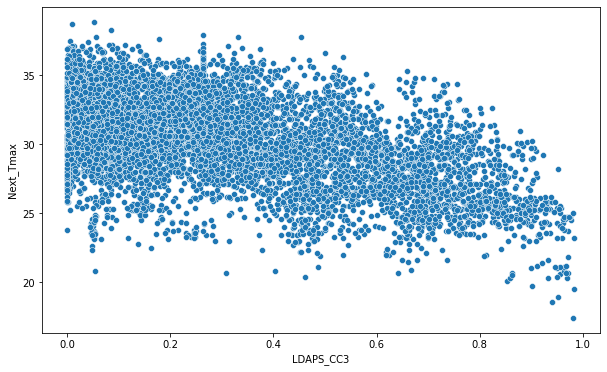

In [495]:
plt.figure(figsize=(10,6))
sns.scatterplot(x="LDAPS_CC3",y="Next_Tmax",data=df)

#### Observation:
- There is a slight negative relationship between LDAPS_CC3 and Next_Tmax.

<AxesSubplot:xlabel='LDAPS_CC4', ylabel='Next_Tmax'>

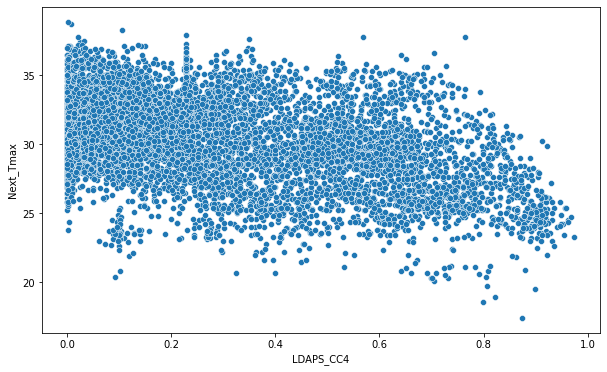

In [496]:
plt.figure(figsize=(10,6))
sns.scatterplot(x="LDAPS_CC4",y="Next_Tmax",data=df)

#### Observation:
- There is a slight negative relationship between LDAPS_CC4 and Next_Tmax.

<AxesSubplot:xlabel='LDAPS_PPT1', ylabel='Next_Tmax'>

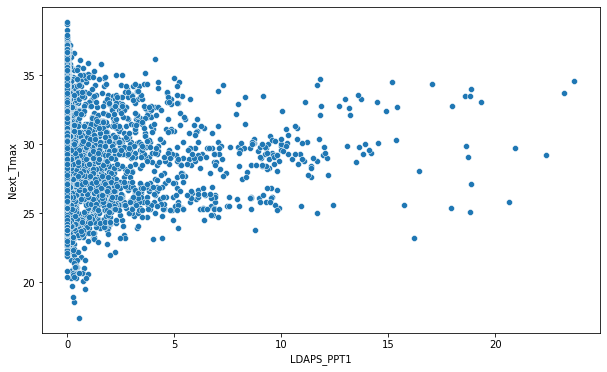

In [497]:
plt.figure(figsize=(10,6))
sns.scatterplot(x="LDAPS_PPT1",y="Next_Tmax",data=df)

#### Observation:
- There is no relationship observed between LDAPS_PPT1 and Next_Tmax.

<AxesSubplot:xlabel='LDAPS_PPT2', ylabel='Next_Tmax'>

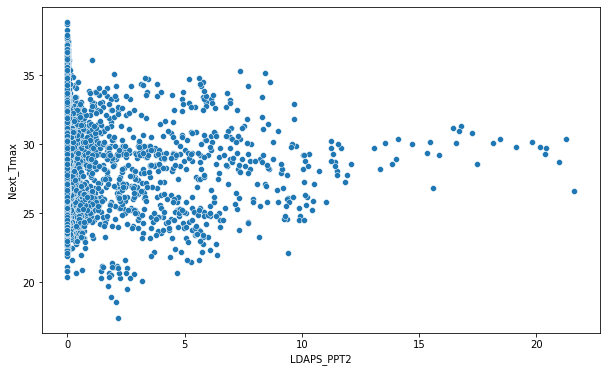

In [498]:
plt.figure(figsize=(10,6))
sns.scatterplot(x="LDAPS_PPT2",y="Next_Tmax",data=df)

#### Observation:
- There is no relationship observed between LDAPS_PPT2 and Next_Tmax.

<AxesSubplot:xlabel='LDAPS_PPT3', ylabel='Next_Tmax'>

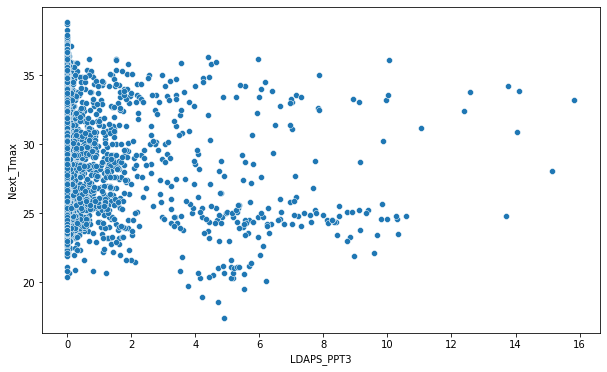

In [499]:
plt.figure(figsize=(10,6))
sns.scatterplot(x="LDAPS_PPT3",y="Next_Tmax",data=df)

#### Observation:
- There is a slight negative relationship between LDAPS_PPT3 and Next_Tmax.

<AxesSubplot:xlabel='LDAPS_PPT4', ylabel='Next_Tmax'>

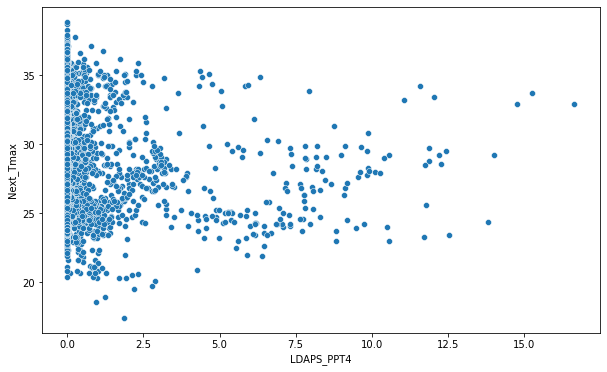

In [500]:
plt.figure(figsize=(10,6))
sns.scatterplot(x="LDAPS_PPT4",y="Next_Tmax",data=df)

#### Observation:
- There is a slight negative relationship between LDAPS_PPT4 and Next_Tmax.

<AxesSubplot:xlabel='lat', ylabel='Next_Tmax'>

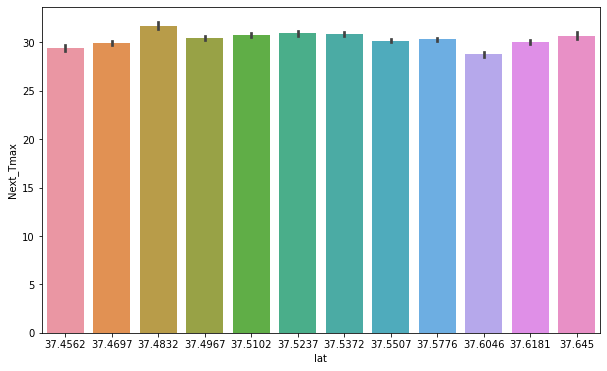

In [501]:
plt.figure(figsize=(10,6))
sns.barplot(x="lat",y="Next_Tmax",data=df)

#### Observation:
- There is no relationship observed between Next_Tmax and lat.

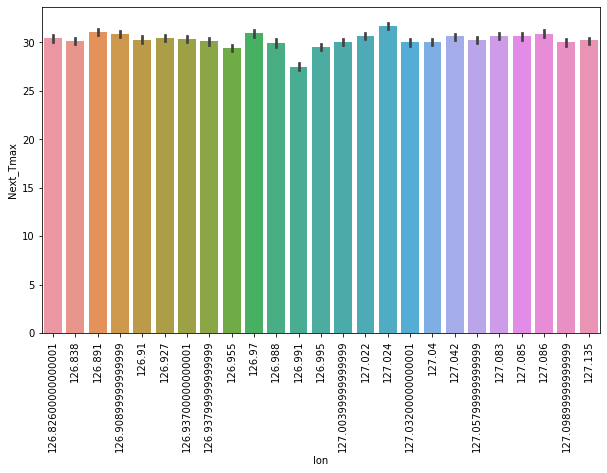

In [558]:
plt.figure(figsize=(10,6))
sns.barplot(x="lon",y="Next_Tmax",data=df)
plt.xticks(rotation=90);

#### Observation:
- There is no relationship observed between Next_Tmax and lat.

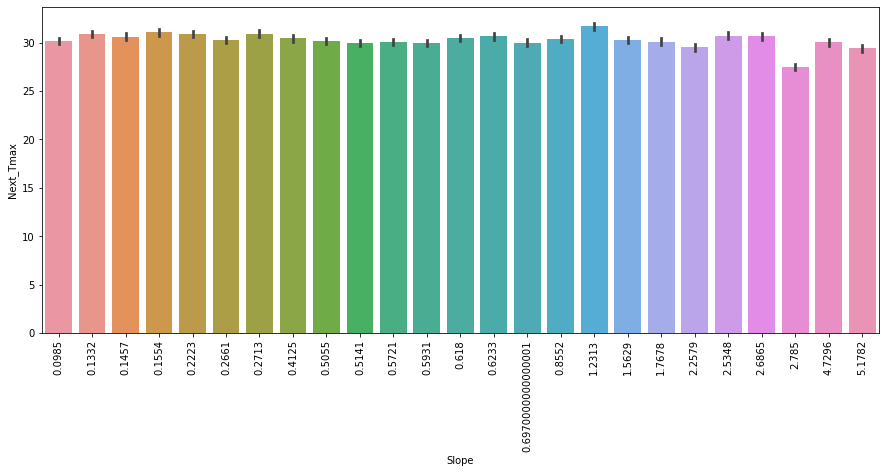

In [503]:
plt.figure(figsize=(15,6))
sns.barplot(x="Slope",y="Next_Tmax",data=df)
plt.xticks(rotation=90);

#### Observation:
- There is no relationship observed between Next_Tmax and Slope.

<AxesSubplot:xlabel='Year', ylabel='Next_Tmax'>

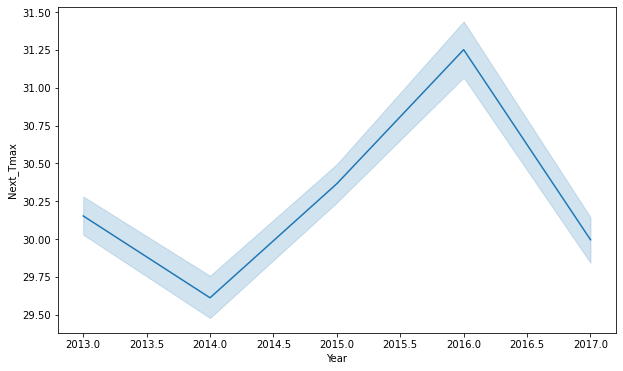

In [504]:
plt.figure(figsize=(10,6))
sns.lineplot(x="Year",y="Next_Tmax",data=df)

<AxesSubplot:xlabel='Present_Tmax', ylabel='Next_Tmin'>

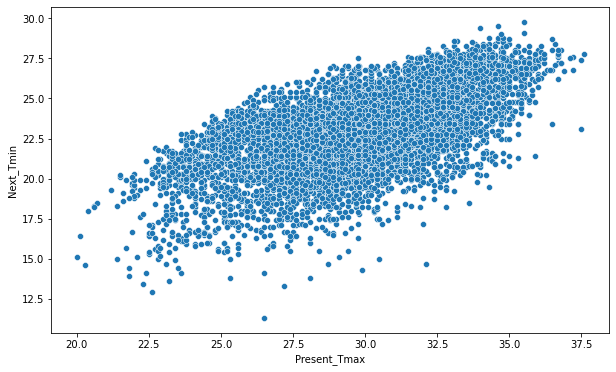

In [559]:
plt.figure(figsize=(10,6))
sns.scatterplot(x="Present_Tmax",y="Next_Tmin",data=df)

#### Observation:
- There is a positive relationship between Present_Tmax and Next_Tmin

<AxesSubplot:xlabel='Present_Tmin', ylabel='Next_Tmin'>

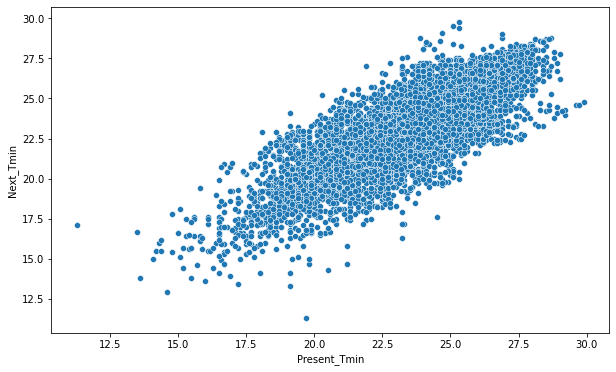

In [560]:
plt.figure(figsize=(10,6))
sns.scatterplot(x="Present_Tmin",y="Next_Tmin",data=df)

#### Observation:
- There is a positive relationship between Present_Tmin and Next_Tmin

<AxesSubplot:xlabel='LDAPS_RHmin', ylabel='Next_Tmin'>

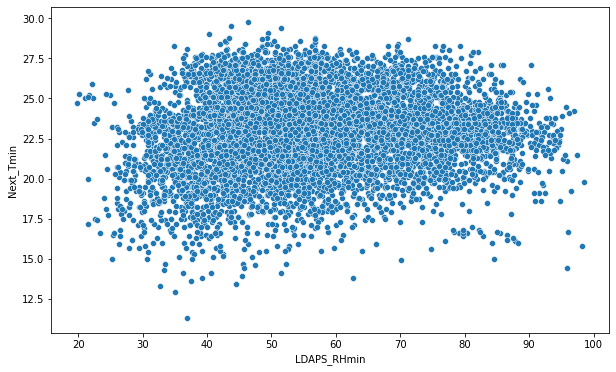

In [561]:
plt.figure(figsize=(10,6))
sns.scatterplot(x="LDAPS_RHmin",y="Next_Tmin",data=df)

#### Observation:
- There is no relationship defined betweeen LDAPS_RHmin.

<AxesSubplot:xlabel='LDAPS_RHmax', ylabel='Next_Tmin'>

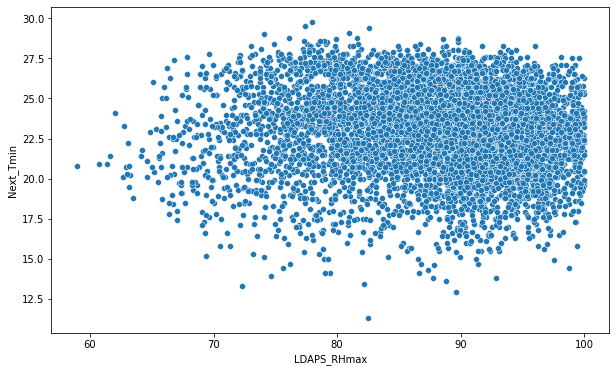

In [562]:
plt.figure(figsize=(10,6))
sns.scatterplot(x="LDAPS_RHmax",y="Next_Tmin",data=df)

#### Observation:
- Higher the LDAPS_RHmax higher is the Next_Tmin. 

<AxesSubplot:xlabel='LDAPS_Tmax_lapse', ylabel='Next_Tmin'>

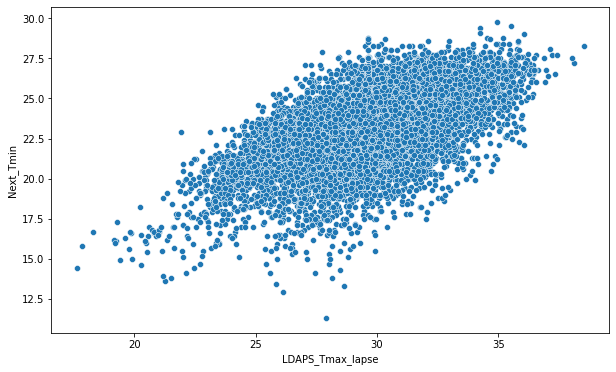

In [563]:
plt.figure(figsize=(10,6))
sns.scatterplot(x="LDAPS_Tmax_lapse",y="Next_Tmin",data=df)

#### Observation:
- There is a positive relationship between LDAPS_Tmax and Next_Tmin

<AxesSubplot:xlabel='LDAPS_Tmin_lapse', ylabel='Next_Tmin'>

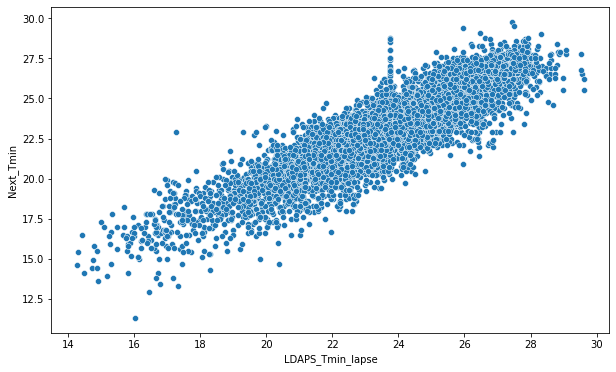

In [564]:
plt.figure(figsize=(10,6))
sns.scatterplot(x="LDAPS_Tmin_lapse",y="Next_Tmin",data=df)

#### Observation:
- There is a positive relationship between LDAPS_Tmin and Next_Tmin

<AxesSubplot:xlabel='LDAPS_WS', ylabel='Next_Tmin'>

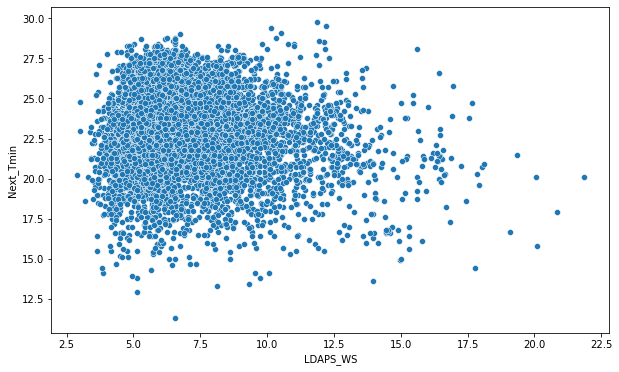

In [565]:
plt.figure(figsize=(10,6))
sns.scatterplot(x="LDAPS_WS",y="Next_Tmin",data=df)

#### Observation:
- There is no relationship defined between LDAPS_WS and Next_Tmin. 

<AxesSubplot:xlabel='LDAPS_LH', ylabel='Next_Tmin'>

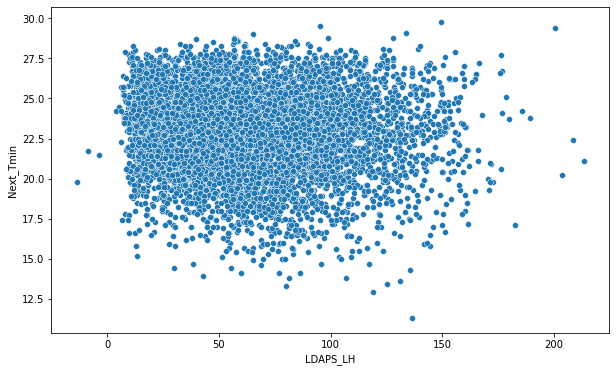

In [566]:
plt.figure(figsize=(10,6))
sns.scatterplot(x="LDAPS_LH",y="Next_Tmin",data=df)

#### Observation:
- There is no relationship defined between LDAPS_LH and Next_Tmin.

<AxesSubplot:xlabel='LDAPS_CC1', ylabel='Next_Tmin'>

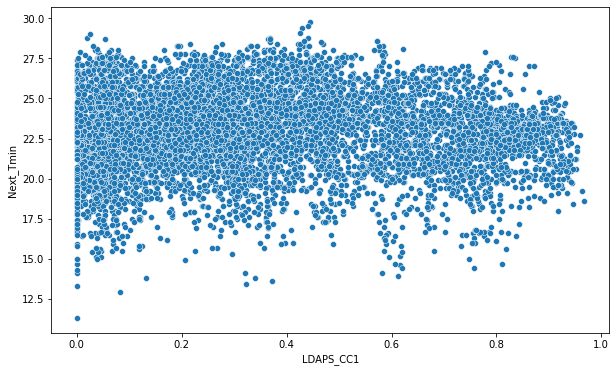

In [567]:
plt.figure(figsize=(10,6))
sns.scatterplot(x="LDAPS_CC1",y="Next_Tmin",data=df)

#### Observation:
- There is no relationship defined between LDAPS_CC1 and Next_Tmin.

<AxesSubplot:xlabel='LDAPS_CC2', ylabel='Next_Tmin'>

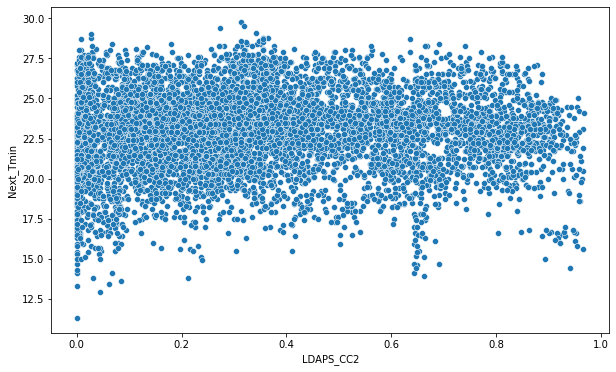

In [568]:
plt.figure(figsize=(10,6))
sns.scatterplot(x="LDAPS_CC2",y="Next_Tmin",data=df)

#### Observation:
- There is no relationship defined between LDAPS_CC2 and Next_Tmin.

<AxesSubplot:xlabel='LDAPS_CC3', ylabel='Next_Tmin'>

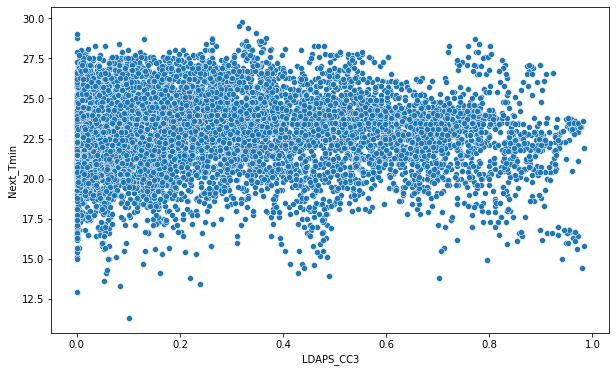

In [569]:
plt.figure(figsize=(10,6))
sns.scatterplot(x="LDAPS_CC3",y="Next_Tmin",data=df)

#### Observation:
- There is no relationship defined between LDAPS_CC3 and Next_Tmin.

<AxesSubplot:xlabel='LDAPS_CC4', ylabel='Next_Tmin'>

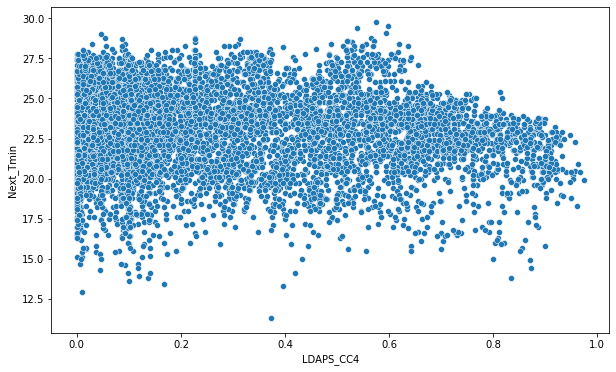

In [570]:
plt.figure(figsize=(10,6))
sns.scatterplot(x="LDAPS_CC4",y="Next_Tmin",data=df)

#### Observation:
- There is no relationship defined between LDAPS_CC4 and Next_Tmin.

<AxesSubplot:xlabel='LDAPS_PPT1', ylabel='Next_Tmin'>

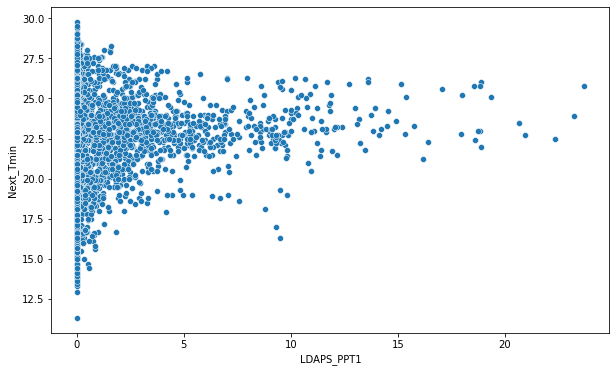

In [571]:
plt.figure(figsize=(10,6))
sns.scatterplot(x="LDAPS_PPT1",y="Next_Tmin",data=df)

#### Observation:
- There is no relationship defined between LDAPS_PPT1 and Next_Tmin.

<AxesSubplot:xlabel='LDAPS_PPT2', ylabel='Next_Tmin'>

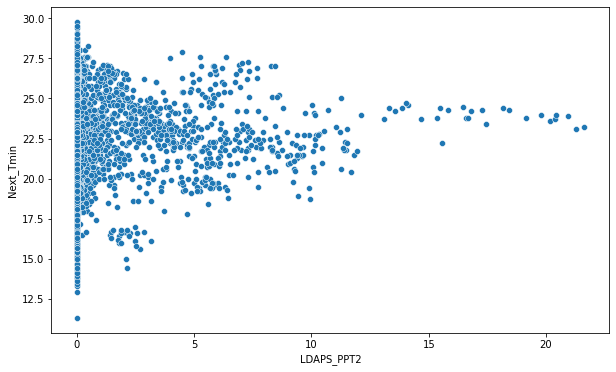

In [572]:
plt.figure(figsize=(10,6))
sns.scatterplot(x="LDAPS_PPT2",y="Next_Tmin",data=df)

#### Observation:
- There is no relationship defined between LDAPS_PPT2 and Next_Tmin.

<AxesSubplot:xlabel='LDAPS_PPT3', ylabel='Next_Tmin'>

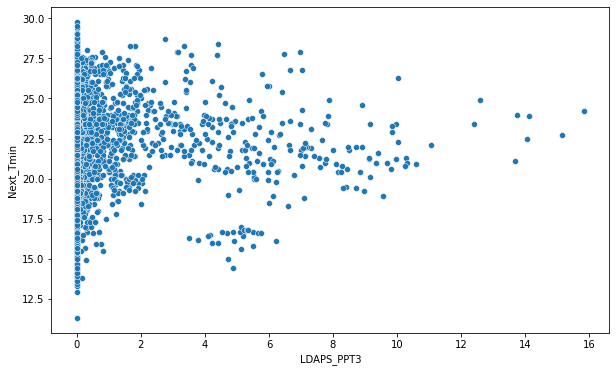

In [573]:
plt.figure(figsize=(10,6))
sns.scatterplot(x="LDAPS_PPT3",y="Next_Tmin",data=df)

#### Observation:
- There is no relationship defined between LDAPS_PPT3 and Next_Tmin.

<AxesSubplot:xlabel='LDAPS_PPT4', ylabel='Next_Tmin'>

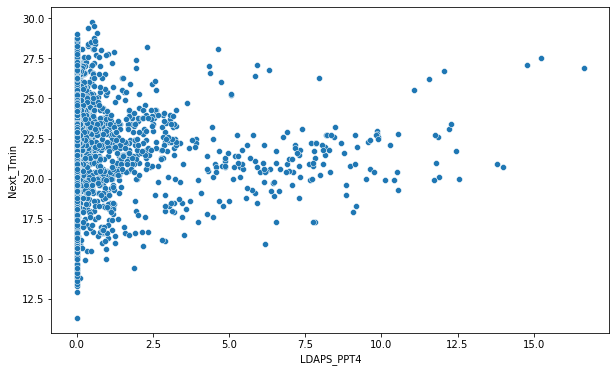

In [574]:
plt.figure(figsize=(10,6))
sns.scatterplot(x="LDAPS_PPT4",y="Next_Tmin",data=df)

#### Observation:
- There is no relationship defined between LDAPS_PPT4 and Next_Tmin.

<AxesSubplot:xlabel='Next_Tmin', ylabel='Next_Tmax'>

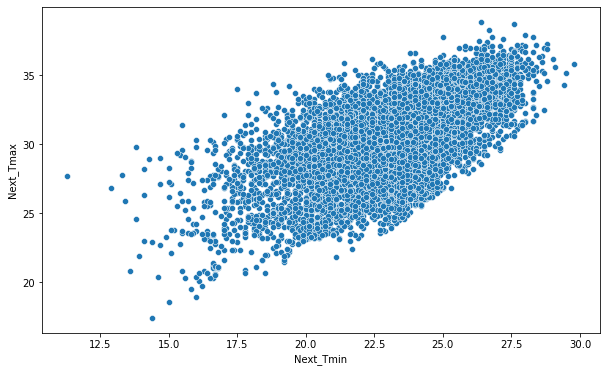

In [575]:
plt.figure(figsize=(10,6))
sns.scatterplot(x="Next_Tmin",y="Next_Tmax",data=df)

#### Observation:
- There is a positive relationship between Next_Tmax and Next_Tmin.

### Correlation Matrix

<AxesSubplot:>

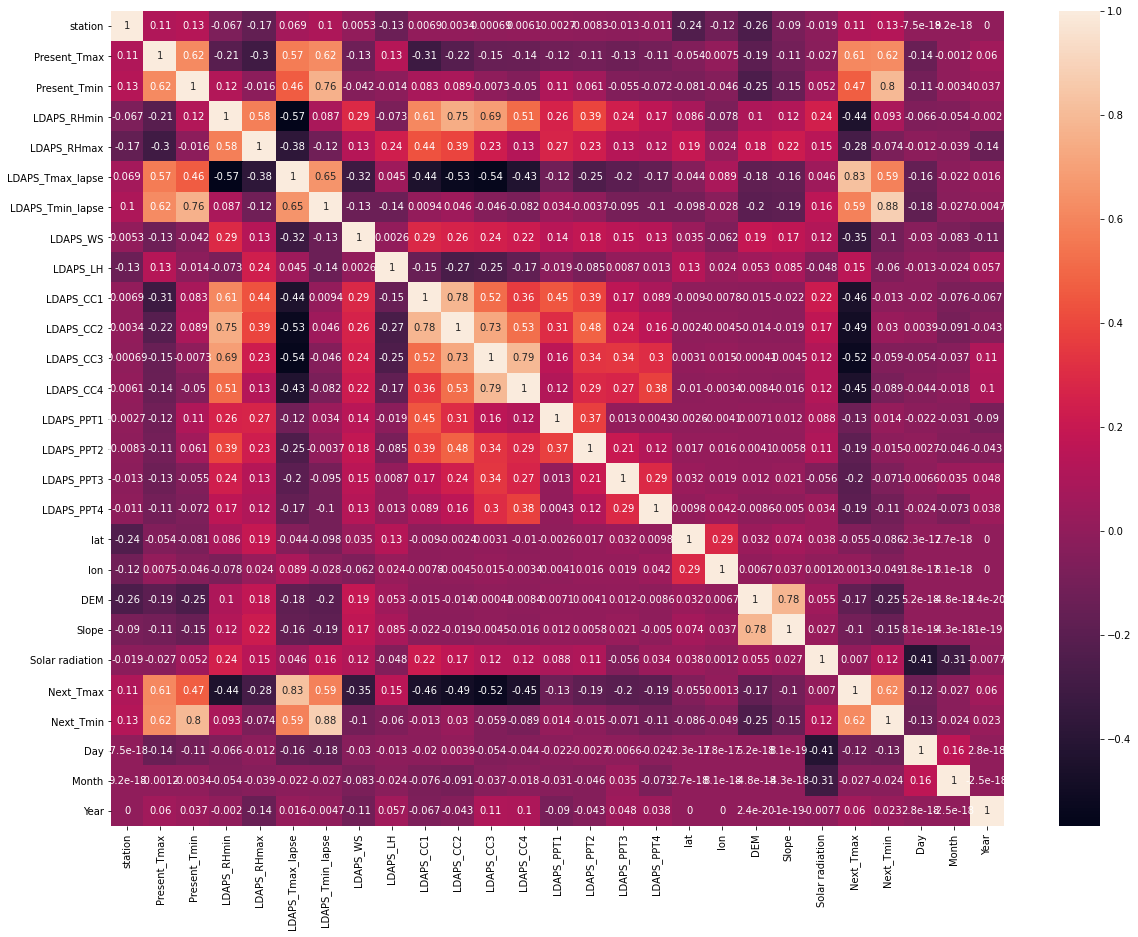

In [507]:
# checking correlation
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),annot=True)

#### Observations with respect to Next_Tmax:
- Next_Tmax is highly correlated with the attributes Next_Tmin, Present_Tmax, Present_Tmin, LDAPS_Tmax_lapse, LDAPS_Tmin_lapse.
- Its least correlated with Solar radiation, lat, lon, Month and Year. 

#### Observations with respect to Next_Tmin:
- Next_Tmin is highly correlated with the attributes Next_Tmax, Present_Tmax, Present_Tmin, LDAPS_Tmax_lapse, LDAPS_Tmin_lapse.
- Its least correlated with lat, lon, Month and Year.

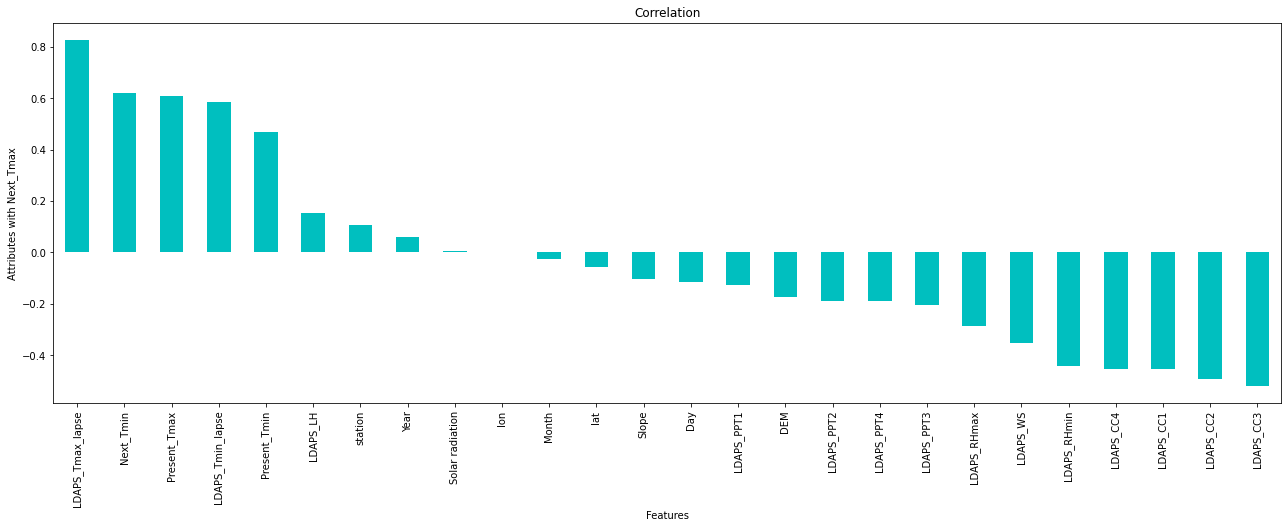

In [508]:
#Plotting bar graph to see strong and weak correlation in graphical form.
plt.figure(figsize=(22,7))
df.corr()['Next_Tmax'].sort_values(ascending=False).drop(['Next_Tmax']).plot(kind="bar",color='c')
plt.xlabel("Features")
plt.ylabel("Attributes with Next_Tmax")
plt.title("Correlation")
plt.show()

#### Observations:
- Next_Tmax is least correlated with lon and Solar Radiation. Highly correlated with LDAPS_Tmax_lapse and Next_Tmin.

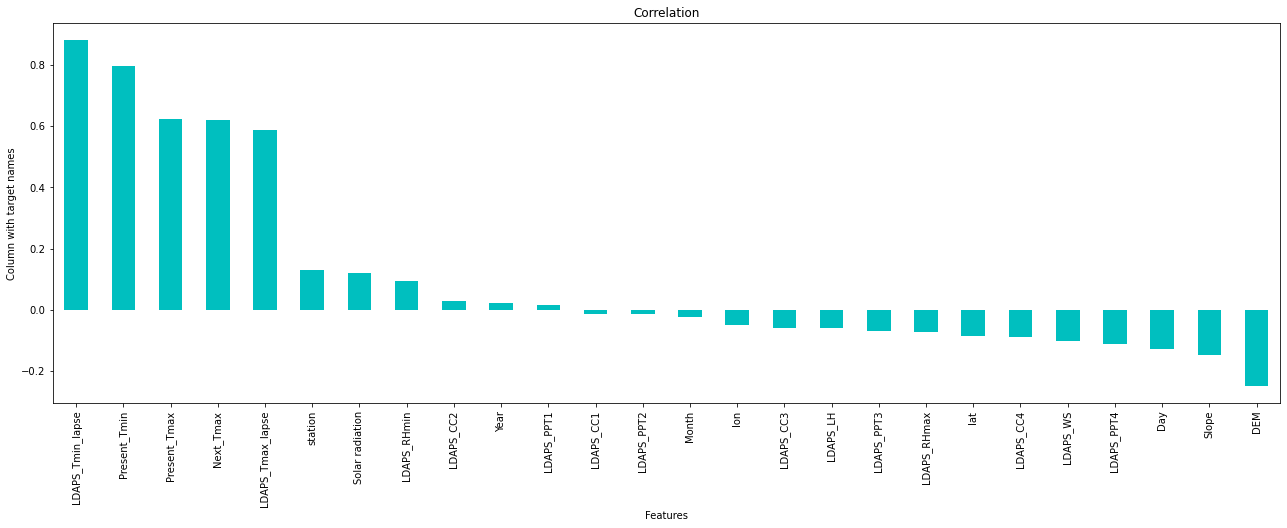

In [509]:
#Plotting bar graph to see strong and weak correlation in graphical form.
plt.figure(figsize=(22,7))
df.corr()['Next_Tmin'].sort_values(ascending=False).drop(['Next_Tmin']).plot(kind="bar",color='c')
plt.xlabel("Features")
plt.ylabel("Column with target names")
plt.title("Correlation")
plt.show()

#### Observations:
- Next_Tmin is least correlated with LDAPS_CC1 and LDAPS_PPT2. Highly correlated with LDAPS_Tmin_lapse, Present_Tmin, Present_Tmax and Next_Tmin.

### Removing Outliers

In [510]:
threshold=3
from scipy.stats import zscore
#z=np.abs(zscore(df[["Present_Tmin","LDAPS_RHmax","LDAPS_Tmax_lapse","LDAPS_Tmin_lapse","LDAPS_WS","LDAPS_LH","Slope"]]))
z=np.abs(zscore(df))
df_new=df[(z<3).all(axis=1)]

In [511]:
df_new.shape

(6888, 27)

- After removing outliers we have 6888 rows and 27 columns. 

### Percentage of data loss:

In [512]:
data_loss=(df.shape[0]-df_new.shape[0])/df.shape[0]*100
print("{:.2f}".format(data_loss),"%")

11.12 %


- There is 11.12% of data loss with the outlier removal. To some extent outliers are removed.

## A] Next_Tmax

### Creating X an Y Split

In [513]:
x=df_new.drop(["Next_Tmax","lon","Solar radiation","Month"],axis=1)
y=df_new["Next_Tmax"]

### Checking and Removing Skewness

In [514]:
df.skew()

station             0.000000
Present_Tmax       -0.263013
Present_Tmin       -0.357565
LDAPS_RHmin         0.300229
LDAPS_RHmax        -0.855863
LDAPS_Tmax_lapse   -0.224207
LDAPS_Tmin_lapse   -0.582013
LDAPS_WS            1.562204
LDAPS_LH            0.672151
LDAPS_CC1           0.459193
LDAPS_CC2           0.471965
LDAPS_CC3           0.646029
LDAPS_CC4           0.673054
LDAPS_PPT1          5.325873
LDAPS_PPT2          5.714821
LDAPS_PPT3          6.370279
LDAPS_PPT4          6.744793
lat                 0.086942
lon                -0.285300
DEM                 1.723944
Slope               1.563346
Solar radiation    -0.511006
Next_Tmax          -0.335956
Next_Tmin          -0.396873
Day                 0.245482
Month              -0.705241
Year                0.000000
dtype: float64

- This is the skewness before removing outliers. 

In [515]:
x.skew()

station             0.002824
Present_Tmax       -0.274048
Present_Tmin       -0.225739
LDAPS_RHmin         0.305363
LDAPS_RHmax        -0.693857
LDAPS_Tmax_lapse   -0.107947
LDAPS_Tmin_lapse   -0.386544
LDAPS_WS            1.098070
LDAPS_LH            0.574350
LDAPS_CC1           0.595343
LDAPS_CC2           0.501691
LDAPS_CC3           0.708337
LDAPS_CC4           0.720486
LDAPS_PPT1          3.742269
LDAPS_PPT2          4.885991
LDAPS_PPT3          5.512872
LDAPS_PPT4          5.968687
lat                 0.108039
DEM                 1.765466
Slope               1.595105
Next_Tmin          -0.238379
Day                 0.255377
Year                0.011207
dtype: float64

- After removing outliers, Skewness is also reduced but not completely.

In [516]:
from sklearn.preprocessing import PowerTransformer

In [517]:
# Power Transformation to remove skewness
PT=PowerTransformer()
data_PT=PT.fit_transform(x)
x=pd.DataFrame(data_PT,columns=x.columns)

In [518]:
x.skew()

station            -0.201843
Present_Tmax       -0.031857
Present_Tmin       -0.021828
LDAPS_RHmin        -0.013769
LDAPS_RHmax        -0.100050
LDAPS_Tmax_lapse   -0.011175
LDAPS_Tmin_lapse   -0.025433
LDAPS_WS            0.005841
LDAPS_LH           -0.028156
LDAPS_CC1           0.062784
LDAPS_CC2           0.047112
LDAPS_CC3           0.092030
LDAPS_CC4           0.140960
LDAPS_PPT1          1.628343
LDAPS_PPT2          1.828992
LDAPS_PPT3          2.004751
LDAPS_PPT4          2.287247
lat                 0.000000
DEM                 0.038756
Slope               0.234034
Next_Tmin          -0.021874
Day                -0.034349
Year                0.000000
dtype: float64

Now, the all the skew values are between -0.5 to +0.5.

### Scaling

- As we have done Power Transformation, there is no need of Scaling as standardize is True for PowerTransformer object. Hence, the model will not be biased.

## Building the Model

In [519]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso,Ridge,LinearRegression
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor

### Finding the Best Random State

In [520]:
maxAcc=0
maxRS=0

for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    mod=LinearRegression()
    mod.fit(x_train,y_train)
    pred=mod.predict(x_test)
    acc=r2_score(y_test,pred)
    
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
        
print("Best accuracy is ",maxAcc," on Random State ",maxRS)

Best accuracy is  0.7974031131542629  on Random State  33


- Using the best Random State to create new train_test_split.

In [521]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=maxRS)

#### 1. LinearRegression

Mean absolute error: 1.039385718867386
Mean squared error: 1.8465422780315357
Root Mean squared error: 1.358875372516382
R2 Score: 0.7974031131542629


<AxesSubplot:title={'center':'Model Coeficients'}>

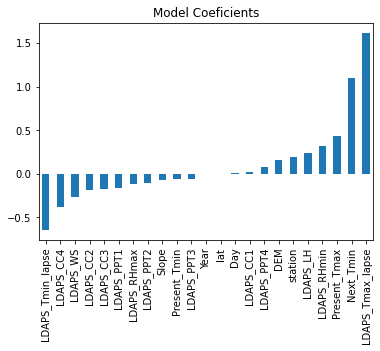

In [522]:
LR=LinearRegression()
LR.fit(x_train,y_train)
pred=LR.predict(x_test)

print("Mean absolute error:",mean_absolute_error(pred,y_test))
print("Mean squared error:",mean_squared_error(pred,y_test))
print("Root Mean squared error:",np.sqrt(mean_squared_error(pred,y_test)))
print("R2 Score:",r2_score(y_test,pred))

coef=pd.Series(LR.coef_,x.columns).sort_values()
coef.plot(kind="bar",title="Model Coeficients")

#### 2. Ridge

Mean absolute error: 1.0393895458886548
Mean squared error: 1.8464960721066488
Root Mean squared error: 1.3588583708785287
R2 Score: 0.7974081827249125


<AxesSubplot:title={'center':'Model Coeficients'}>

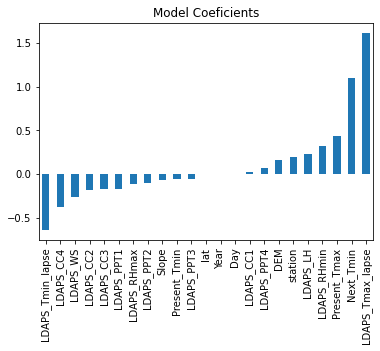

In [523]:
R=Ridge()
R.fit(x_train,y_train)
pred=R.predict(x_test)

print("Mean absolute error:",mean_absolute_error(pred,y_test))
print("Mean squared error:",mean_squared_error(pred,y_test))
print("Root Mean squared error:",np.sqrt(mean_squared_error(pred,y_test)))
print("R2 Score:",r2_score(y_test,pred))

coef=pd.Series(R.coef_,x.columns).sort_values()
coef.plot(kind="bar",title="Model Coeficients")

#### 3. RandomForestRegressor

Mean absolute error: 0.7307143407812395
Mean squared error: 0.9561851177038945
Root Mean squared error: 0.9778471852513022
R2 Score: 0.895090337004607


<AxesSubplot:title={'center':'Feature Importance'}>

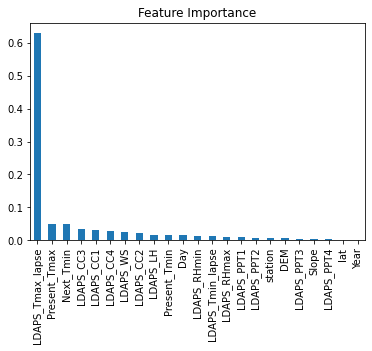

In [524]:
RFR=RandomForestRegressor()
RFR.fit(x_train,y_train)
pred=RFR.predict(x_test)

print("Mean absolute error:",mean_absolute_error(pred,y_test))
print("Mean squared error:",mean_squared_error(pred,y_test))
print("Root Mean squared error:",np.sqrt(mean_squared_error(pred,y_test)))
print("R2 Score:",r2_score(y_test,pred))

features=pd.Series(RFR.feature_importances_,x.columns).sort_values(ascending=False)
features.plot(kind="bar",title="Feature Importance")

#### 4. GradientBoostingRegressor

Mean absolute error: 0.8844142353965889
Mean squared error: 1.3276451048847677
Root Mean squared error: 1.152234830616037
R2 Score: 0.8543349002697233


<AxesSubplot:title={'center':'Feature Importance'}>

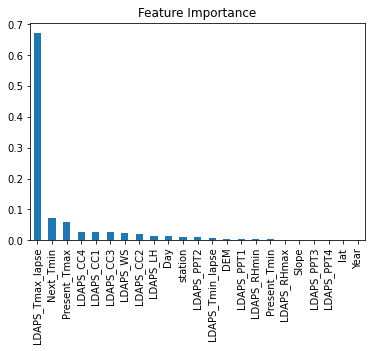

In [525]:
GBR=GradientBoostingRegressor()
GBR.fit(x_train,y_train)
pred=GBR.predict(x_test)

print("Mean absolute error:",mean_absolute_error(pred,y_test))
print("Mean squared error:",mean_squared_error(pred,y_test))
print("Root Mean squared error:",np.sqrt(mean_squared_error(pred,y_test)))
print("R2 Score:",r2_score(y_test,pred))

features=pd.Series(GBR.feature_importances_,x.columns).sort_values(ascending=False)
features.plot(kind="bar",title="Feature Importance")

#### 5. ExtraTreesRegressor

Mean absolute error: 0.650160223765976
Mean squared error: 0.7431948813055442
Root Mean squared error: 0.8620875137162957
R2 Score: 0.9184589645937049


<AxesSubplot:title={'center':'Feature Importance'}>

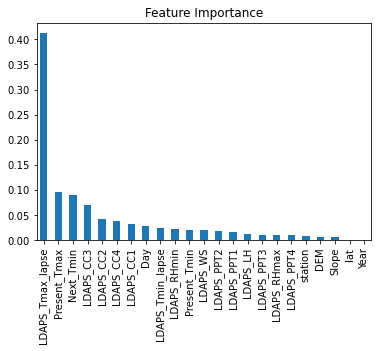

In [526]:
ETR=ExtraTreesRegressor()
ETR.fit(x_train,y_train)
pred=ETR.predict(x_test)

print("Mean absolute error:",mean_absolute_error(pred,y_test))
print("Mean squared error:",mean_squared_error(pred,y_test))
print("Root Mean squared error:",np.sqrt(mean_squared_error(pred,y_test)))
print("R2 Score:",r2_score(y_test,pred))

features=pd.Series(ETR.feature_importances_,x.columns).sort_values(ascending=False)
features.plot(kind="bar",title="Feature Importance")

### Cross Validation Score

In [527]:
from sklearn.model_selection import cross_val_score

In [528]:
print(cross_val_score(LR,x,y,cv=5).mean()) #cross validation for LinearRegression

0.7015121934004753


In [529]:
print(cross_val_score(R,x,y,cv=5).mean()) #cross validation for Ridge

0.7015438111296243


In [530]:
print(cross_val_score(RFR,x,y,cv=5).mean()) #cross validation for RandomForestRegressor

0.6705869138682928


In [531]:
print(cross_val_score(GBR,x,y,cv=5).mean()) #cross validation for GradientBoostingRegressor

0.6920283567214944


In [532]:
print(cross_val_score(ETR,x,y,cv=5).mean()) #cross validation for ExtraTreesRegressor

0.6809262517227705


- Here we observe that after doing cross validation LinearRegression is giving the least difference. We can definitely consider it as our best model.

## Hyper Parameter Tuning

- Now, let's apply Hyper Paramter Tuning on the best model to improve the accuracy score.

In [533]:
# importing GridSearchCV module
from sklearn.model_selection import GridSearchCV

In [534]:
parameters={"fit_intercept":[True,False],
            "normalize":[True,False],
            "n_jobs":[4,4,5,6,7,8],
            "copy_X":[True,False]}

In [535]:
GCVLR_Tmax=GridSearchCV(LinearRegression(),parameters,cv=5)
GCVLR_Tmax.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'n_jobs': [4, 4, 5, 6, 7, 8],
                         'normalize': [True, False]})

In [536]:
GCVLR_Tmax.best_params_

{'copy_X': True, 'fit_intercept': True, 'n_jobs': 4, 'normalize': True}

In [537]:
Final_modTmax=LinearRegression(copy_X=True,fit_intercept=True,n_jobs=4,normalize=True)
Final_modTmax.fit(x_train,y_train)
pred=Final_modTmax.predict(x_test)
acc=r2_score(y_test,pred)
print(acc*100)

79.7403113154263


- After Hyper Parameter tuning, the improved score of the Next_Tmax best model LinearRegression is 80%

## B] Next_Tmin

### Creating X an Y Split

In [538]:
X=df_new.drop(["Next_Tmin","LDAPS_CC1","LDAPS_PPT2"],axis=1)
Y=df_new["Next_Tmin"]

### Checking and Removing Skewness

In [539]:
X.skew()

station             0.002824
Present_Tmax       -0.274048
Present_Tmin       -0.225739
LDAPS_RHmin         0.305363
LDAPS_RHmax        -0.693857
LDAPS_Tmax_lapse   -0.107947
LDAPS_Tmin_lapse   -0.386544
LDAPS_WS            1.098070
LDAPS_LH            0.574350
LDAPS_CC2           0.501691
LDAPS_CC3           0.708337
LDAPS_CC4           0.720486
LDAPS_PPT1          3.742269
LDAPS_PPT3          5.512872
LDAPS_PPT4          5.968687
lat                 0.108039
lon                -0.275324
DEM                 1.765466
Slope               1.595105
Solar radiation    -0.505080
Next_Tmax          -0.268494
Day                 0.255377
Month              -0.683268
Year                0.011207
dtype: float64

In [540]:
from sklearn.preprocessing import PowerTransformer
# Power Transformation to remove skewness
PT=PowerTransformer()
data_PT=PT.fit_transform(X)
X=pd.DataFrame(data_PT,columns=X.columns)

In [541]:
X.skew()

station            -0.201843
Present_Tmax       -0.031857
Present_Tmin       -0.021828
LDAPS_RHmin        -0.013769
LDAPS_RHmax        -0.100050
LDAPS_Tmax_lapse   -0.011175
LDAPS_Tmin_lapse   -0.025433
LDAPS_WS            0.005841
LDAPS_LH           -0.028156
LDAPS_CC2           0.047112
LDAPS_CC3           0.092030
LDAPS_CC4           0.140960
LDAPS_PPT1          1.628343
LDAPS_PPT3          2.004751
LDAPS_PPT4          2.287247
lat                 0.000000
lon                -0.189265
DEM                 0.038756
Slope               0.234034
Solar radiation    -0.166097
Next_Tmax          -0.035546
Day                -0.034349
Month               0.040224
Year                0.000000
dtype: float64

Now, the all the skew values are between -0.5 to +0.5.

### Scaling

- As we have done Power Transformation, there is no need of Scaling as standardize is True for PowerTransformer object. Hence, the model will not be biased.

## Building the Model

### Finding the Best Random State

In [542]:
maxAcc=0
maxRS=0

for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=.20,random_state=i)
    mod=LinearRegression()
    mod.fit(x_train,y_train)
    pred=mod.predict(x_test)
    acc=r2_score(y_test,pred)
    
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
        
print("Best accuracy is ",maxAcc," on Random State ",maxRS)

Best accuracy is  0.8502475710986189  on Random State  172


In [543]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.20,random_state=maxRS)

#### 1. LinearRegression

Mean absolute error: 0.7258933572696313
Mean squared error: 0.8382382426789926
Root Mean squared error: 0.9155535171026282
R2 Score: 0.8502475710986189


<AxesSubplot:title={'center':'Model Coeficients'}>

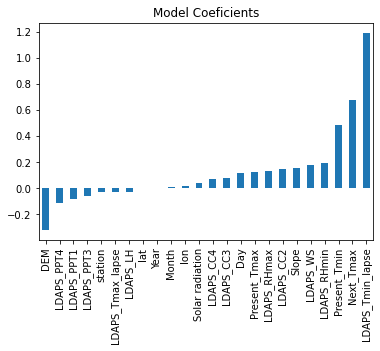

In [544]:
LR=LinearRegression()
LR.fit(x_train,y_train)
pred=LR.predict(x_test)

print("Mean absolute error:",mean_absolute_error(pred,y_test))
print("Mean squared error:",mean_squared_error(pred,y_test))
print("Root Mean squared error:",np.sqrt(mean_squared_error(pred,y_test)))
print("R2 Score:",r2_score(y_test,pred))

coef=pd.Series(LR.coef_,X.columns).sort_values()
coef.plot(kind="bar",title="Model Coeficients")

#### 2. Ridge

Mean absolute error: 0.7258738008367024
Mean squared error: 0.838215723376407
Root Mean squared error: 0.915541218829828
R2 Score: 0.8502515942033733


<AxesSubplot:title={'center':'Model Coeficients'}>

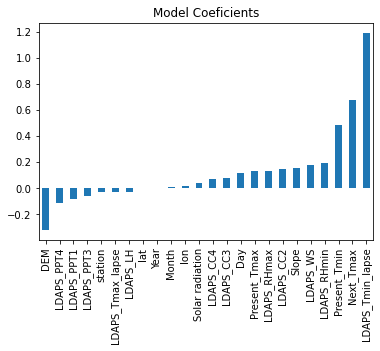

In [545]:
R=Ridge()
R.fit(x_train,y_train)
pred=R.predict(x_test)

print("Mean absolute error:",mean_absolute_error(pred,y_test))
print("Mean squared error:",mean_squared_error(pred,y_test))
print("Root Mean squared error:",np.sqrt(mean_squared_error(pred,y_test)))
print("R2 Score:",r2_score(y_test,pred))

coef=pd.Series(R.coef_,X.columns).sort_values()
coef.plot(kind="bar",title="Model Coeficients")

#### 3. RandomForestRegressor

Mean absolute error: 0.5440268048529604
Mean squared error: 0.49782981065226856
Root Mean squared error: 0.7055705568206971
R2 Score: 0.9110620113365054


<AxesSubplot:title={'center':'Feature Importance'}>

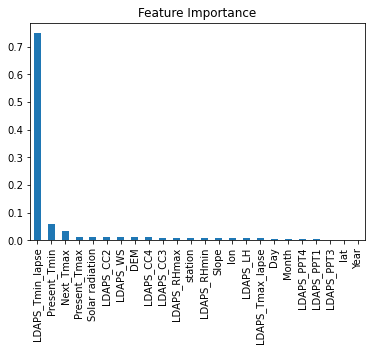

In [546]:
RFR=RandomForestRegressor()
RFR.fit(x_train,y_train)
pred=RFR.predict(x_test)

print("Mean absolute error:",mean_absolute_error(pred,y_test))
print("Mean squared error:",mean_squared_error(pred,y_test))
print("Root Mean squared error:",np.sqrt(mean_squared_error(pred,y_test)))
print("R2 Score:",r2_score(y_test,pred))

features=pd.Series(RFR.feature_importances_,X.columns).sort_values(ascending=False)
features.plot(kind="bar",title="Feature Importance")

#### 4. GradientBoostingRegressor

Mean absolute error: 0.5942043386003217
Mean squared error: 0.5681398995700029
Root Mean squared error: 0.7537505552701125
R2 Score: 0.8985010160781025


<AxesSubplot:title={'center':'Feature Importance'}>

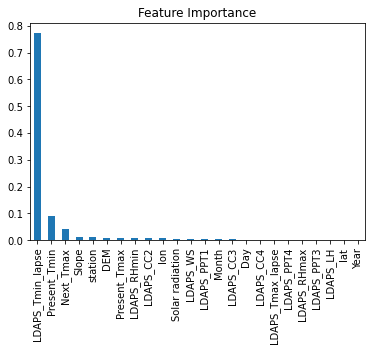

In [547]:
GBR=GradientBoostingRegressor()
GBR.fit(x_train,y_train)
pred=GBR.predict(x_test)

print("Mean absolute error:",mean_absolute_error(pred,y_test))
print("Mean squared error:",mean_squared_error(pred,y_test))
print("Root Mean squared error:",np.sqrt(mean_squared_error(pred,y_test)))
print("R2 Score:",r2_score(y_test,pred))

features=pd.Series(GBR.feature_importances_,X.columns).sort_values(ascending=False)
features.plot(kind="bar",title="Feature Importance")

#### 5. ExtraTreesRegressor

Mean absolute error: 0.5029076306828058
Mean squared error: 0.4348117051345767
Root Mean squared error: 0.6594025364938906
R2 Score: 0.9223202836098833


<AxesSubplot:title={'center':'Feature Importance'}>

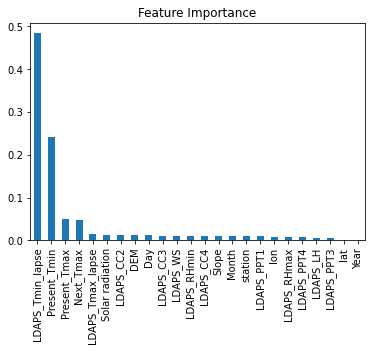

In [548]:
ETR=ExtraTreesRegressor()
ETR.fit(x_train,y_train)
pred=ETR.predict(x_test)

print("Mean absolute error:",mean_absolute_error(pred,y_test))
print("Mean squared error:",mean_squared_error(pred,y_test))
print("Root Mean squared error:",np.sqrt(mean_squared_error(pred,y_test)))
print("R2 Score:",r2_score(y_test,pred))

features=pd.Series(ETR.feature_importances_,X.columns).sort_values(ascending=False)
features.plot(kind="bar",title="Feature Importance")

### Cross Validation Score

In [549]:
print(cross_val_score(LR,x,y,cv=5).mean()) #cross validation for LinearRegression

0.7015121934004753


In [550]:
print(cross_val_score(R,x,y,cv=5).mean()) #cross validation for Ridge

0.7015438111296243


In [551]:
print(cross_val_score(RFR,x,y,cv=5).mean()) #cross validation for Ridge

0.6774101838885404


In [552]:
print(cross_val_score(GBR,x,y,cv=5).mean()) #cross validation for Ridge

0.6926578150637199


In [553]:
print(cross_val_score(ETR,x,y,cv=5).mean()) #cross validation for Ridge

0.6820635042742043


- Here we observe that after doing cross validation LinearRegression is giving the least difference. We can definitely consider it as our best model.

## Hyper Parameter Tuning

- Now, let's apply Hyper Paramter Tuning on the best model to improve the r2 score.

In [554]:
parameters={"fit_intercept":[True,False],
            "normalize":[True,False],
            "n_jobs":[4,4,5,6,7,8],
            "copy_X":[True,False]}

In [555]:
GCVLR_Tmin=GridSearchCV(LinearRegression(),parameters,cv=5)
GCVLR_Tmin.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'n_jobs': [4, 4, 5, 6, 7, 8],
                         'normalize': [True, False]})

In [556]:
GCVLR_Tmax.best_params_

{'copy_X': True, 'fit_intercept': True, 'n_jobs': 4, 'normalize': True}

In [557]:
Final_modTmin=LinearRegression(copy_X=True,fit_intercept=True,n_jobs=4,normalize=True)
Final_modTmin.fit(x_train,y_train)
pred=Final_modTmin.predict(x_test)
acc=r2_score(y_test,pred)
print(acc*100)

85.02475710986188


- After Hyper Parameter tuning, the improved score of the Next_Tmin best model LinearRegression is 85%

## Saving The Model

In [578]:
# Next_Tmax
import joblib
joblib.dump(Final_modTmax,"Next_Tmax.pkl")

['Next_Tmax.pkl']

In [579]:
# Next_Tmin
joblib.dump(Final_modTmin,"Next_Tmin.pkl")

['Next_Tmin.pkl']